In [1]:
!pip install u8darts[all] optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.7/760.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import darts
import random
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RegressionModel, CatBoostModel, RandomForest, LightGBMModel, XGBModel, RNNModel
from darts.metrics import rmse, mape
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import optuna

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/Omdena Projects/Weather Prediction for Pakistan'

In [15]:
data = pd.read_csv(f'{path}/df_final_Karachi.csv')
# data.drop(columns='Unnamed: 0', inplace=True)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data.head()

,city,temperature_2m_min,temperature_2m_mean,temperature_2m_max,temp_range,daylight,precipitation_sum,precipitation_hours,precipitation_rate,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration
time,,,,,,,,,,,,,
2010-01-01,Karachi,14.8,20.9,26.0,11.2,10.633333,0.0,0,0.0,18.3,25.6,16.25,4.38
2010-01-02,Karachi,15.6,20.5,25.3,9.7,10.616667,0.0,0,0.0,24.6,35.3,9.15,3.84
2010-01-03,Karachi,14.3,19.9,25.0,10.7,10.633333,0.0,0,0.0,16.6,28.1,16.03,3.69
2010-01-04,Karachi,15.0,20.4,25.6,10.6,10.650000,0.0,0,0.0,14.0,22.7,16.32,3.63
2010-01-05,Karachi,16.3,20.7,25.4,9.1,10.650000,0.0,0,0.0,19.3,29.2,16.37,3.55


**Optuna Tuning**

I'm going to loop through the temperature columns and use optuna to find out the best darts model & best parameters thatwork for that feature/column

[I 2023-08-26 16:12:29,894] A new study created in memory with name: no-name-e02e37c2-930d-402d-8dc4-62e214dc60d5


temperature_2m_mean


[I 2023-08-26 16:12:32,456] Trial 0 finished with value: 1.3644071958668424 and parameters: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}. Best is trial 0 with value: 1.3644071958668424.


Current value: 1.3644071958668424, Current params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}
Best value: 1.3644071958668424, Best params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:12:32,699] Trial 1 finished with value: 1.2838161442751053 and parameters: {'lags': [-13, -16, -3], 'model': 'XGBModel'}. Best is trial 1 with value: 1.2838161442751053.
[I 2023-08-26 16:12:32,761] Trial 2 finished with value: 1.5767456858141506 and parameters: {'lags': [-13, -16, -3], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.2838161442751053.


Current value: 1.2838161442751053, Current params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}
Best value: 1.2838161442751053, Best params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}
Current value: 1.5767456858141506, Current params: {'lags': [-13, -16, -3], 'model': 'RegressionModel'}
Best value: 1.2838161442751053, Best params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}


[I 2023-08-26 16:12:32,996] Trial 3 finished with value: 1.3529963427030112 and parameters: {'lags': [-16, -8, -20], 'model': 'XGBModel'}. Best is trial 1 with value: 1.2838161442751053.
[I 2023-08-26 16:12:33,056] Trial 4 finished with value: 1.5757390535128033 and parameters: {'lags': [-8, -17, -14], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.2838161442751053.


Current value: 1.3529963427030112, Current params: {'lags': [-16, -8, -20], 'model': 'XGBModel'}
Best value: 1.2838161442751053, Best params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}
Current value: 1.5757390535128033, Current params: {'lags': [-8, -17, -14], 'model': 'RegressionModel'}
Best value: 1.2838161442751053, Best params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}


[I 2023-08-26 16:12:33,769] Trial 5 finished with value: 1.2163591658579975 and parameters: {'lags': [-8, -17, -14], 'model': 'RandomForest'}. Best is trial 5 with value: 1.2163591658579975.
[I 2023-08-26 16:12:33,827] Trial 6 finished with value: 1.5767456858141506 and parameters: {'lags': [-13, -16, -3], 'model': 'RegressionModel'}. Best is trial 5 with value: 1.2163591658579975.
[I 2023-08-26 16:12:33,884] Trial 7 finished with value: 1.5869531956912004 and parameters: {'lags': [-15, -3, -8], 'model': 'RegressionModel'}. Best is trial 5 with value: 1.2163591658579975.


Current value: 1.2163591658579975, Current params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Best value: 1.2163591658579975, Best params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Current value: 1.5767456858141506, Current params: {'lags': [-13, -16, -3], 'model': 'RegressionModel'}
Best value: 1.2163591658579975, Best params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Current value: 1.5869531956912004, Current params: {'lags': [-15, -3, -8], 'model': 'RegressionModel'}
Best value: 1.2163591658579975, Best params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}


[I 2023-08-26 16:12:34,564] Trial 8 finished with value: 1.39588328365758 and parameters: {'lags': [-17, -4, -16], 'model': 'RandomForest'}. Best is trial 5 with value: 1.2163591658579975.


Current value: 1.39588328365758, Current params: {'lags': [-17, -4, -16], 'model': 'RandomForest'}
Best value: 1.2163591658579975, Best params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}


[I 2023-08-26 16:12:35,783] Trial 9 finished with value: 1.3698918823731046 and parameters: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}. Best is trial 5 with value: 1.2163591658579975.


Current value: 1.3698918823731046, Current params: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}
Best value: 1.2163591658579975, Best params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}


[I 2023-08-26 16:12:36,518] Trial 10 finished with value: 1.164246782081357 and parameters: {'lags': [-3, -14, -20], 'model': 'RandomForest'}. Best is trial 10 with value: 1.164246782081357.


Current value: 1.164246782081357, Current params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}
Best value: 1.164246782081357, Best params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}


[I 2023-08-26 16:12:37,183] Trial 11 finished with value: 1.154079143390783 and parameters: {'lags': [-3, -14, -20], 'model': 'RandomForest'}. Best is trial 11 with value: 1.154079143390783.


Current value: 1.154079143390783, Current params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}
Best value: 1.154079143390783, Best params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}


[I 2023-08-26 16:12:37,853] Trial 12 finished with value: 1.1625665875994962 and parameters: {'lags': [-3, -14, -20], 'model': 'RandomForest'}. Best is trial 11 with value: 1.154079143390783.
[I 2023-08-26 16:12:38,012] Trial 13 finished with value: 1.1514281742698689 and parameters: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}. Best is trial 13 with value: 1.1514281742698689.


Current value: 1.1625665875994962, Current params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}
Best value: 1.154079143390783, Best params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4896, number of used features: 1
[LightGBM] [Info] Start training from score 0.000886
Current value: 1.1514281742698689, Current params: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}
Best value: 1.1514281742698689, Best params: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4896, num

[I 2023-08-26 16:12:38,173] Trial 14 finished with value: 1.1514281742698689 and parameters: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}. Best is trial 13 with value: 1.1514281742698689.
[I 2023-08-26 16:12:38,327] Trial 15 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1514281742698689, Current params: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}
Best value: 1.1514281742698689, Best params: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, nu

[I 2023-08-26 16:12:38,489] Trial 16 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:38,658] Trial 17 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, numb

[I 2023-08-26 16:12:38,836] Trial 18 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:39,011] Trial 19 finished with value: 1.3747512504649868 and parameters: {'lags': [-11, -12, -12], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4888, number of used features: 1
[LightGBM] [Info] Start training from score 0.003380
Current value: 1.3747512504649868, Current params: {'lags': [-11, -12, -12], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4880, nu

[I 2023-08-26 16:12:39,173] Trial 20 finished with value: 1.3564352586496402 and parameters: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:39,340] Trial 21 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3564352586496402, Current params: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, nu

[I 2023-08-26 16:12:39,529] Trial 22 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:39,696] Trial 23 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, numb

[I 2023-08-26 16:12:39,860] Trial 24 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:40,022] Trial 25 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:41,222] Trial 26 finished with value: 1.1514913253860386 and parameters: {'lags': [-4, -14, -7], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1514913253860386, Current params: {'lags': [-4, -14, -7], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4888, number of used features: 1
[LightGBM] [Info] Start training from score 0.003380


[I 2023-08-26 16:12:41,456] Trial 27 finished with value: 1.3747512504649868 and parameters: {'lags': [-11, -12, -12], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3747512504649868, Current params: {'lags': [-11, -12, -12], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:41,866] Trial 28 finished with value: 1.3780217674287443 and parameters: {'lags': [-15, -3, -8], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3780217674287443, Current params: {'lags': [-15, -3, -8], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:44,424] Trial 29 finished with value: 1.3644071958668424 and parameters: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3644071958668424, Current params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4883, number of used features: 1
[LightGBM] [Info] Start training from score 0.005181


[I 2023-08-26 16:12:44,688] Trial 30 finished with value: 1.3514201767969858 and parameters: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3514201767969858, Current params: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:44,944] Trial 31 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:45,228] Trial 32 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:45,472] Trial 33 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:45,883] Trial 34 finished with value: 1.1497807587918147 and parameters: {'lags': [-4, -14, -7], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1497807587918147, Current params: {'lags': [-4, -14, -7], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4880, number of used features: 1
[LightGBM] [Info] Start training from score 0.006155


[I 2023-08-26 16:12:46,125] Trial 35 finished with value: 1.3564352586496402 and parameters: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3564352586496402, Current params: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4887, number of used features: 1
[LightGBM] [Info] Start training from score 0.003755


[I 2023-08-26 16:12:46,392] Trial 36 finished with value: 1.3401745224272397 and parameters: {'lags': [-12, -7, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3401745224272397, Current params: {'lags': [-12, -7, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:46,830] Trial 37 finished with value: 1.2838161442751053 and parameters: {'lags': [-13, -16, -3], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:46,934] Trial 38 finished with value: 1.5757390535128033 and parameters: {'lags': [-8, -17, -14], 'model': 'RegressionModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.2838161442751053, Current params: {'lags': [-13, -16, -3], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Current value: 1.5757390535128033, Current params: {'lags': [-8, -17, -14], 'model': 'RegressionModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:47,196] Trial 39 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:48,929] Trial 40 finished with value: 1.3768206332453667 and parameters: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:49,091] Trial 41 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3768206332453667, Current params: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, num

[I 2023-08-26 16:12:49,250] Trial 42 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:49,312] Trial 43 finished with value: 1.9269322811544993 and parameters: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Current value: 1.9269322811544993, Current params: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 1
[LightGBM] [Info] Start training from score 0.005531


[I 2023-08-26 16:12:49,478] Trial 44 finished with value: 1.3633891178086905 and parameters: {'lags': [-17, -4, -16], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:49,634] Trial 45 finished with value: 1.3772001853304134 and parameters: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3633891178086905, Current params: {'lags': [-17, -4, -16], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4884, number of used features: 1
[LightGBM] [Info] Start training from score 0.004836
Current value: 1.3772001853304134, Current params: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, num

[I 2023-08-26 16:12:49,806] Trial 46 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:50,475] Trial 47 finished with value: 1.207963350967511 and parameters: {'lags': [-8, -17, -14], 'model': 'RandomForest'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:50,630] Trial 48 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.207963350967511, Current params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:50,694] Trial 49 finished with value: 1.5620666876513516 and parameters: {'lags': [-11, -12, -12], 'model': 'RegressionModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:50,863] Trial 50 finished with value: 1.284986312117081 and parameters: {'lags': [-13, -16, -3], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.5620666876513516, Current params: {'lags': [-11, -12, -12], 'model': 'RegressionModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4886, number of used features: 1
[LightGBM] [Info] Start training from score 0.004121
Current value: 1.284986312117081, Current params: {'lags': [-13, -16, -3], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, 

[I 2023-08-26 16:12:51,061] Trial 51 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:51,226] Trial 52 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, numb

[I 2023-08-26 16:12:51,398] Trial 53 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:51,546] Trial 54 finished with value: 1.3564352586496402 and parameters: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4880, number of used features: 1
[LightGBM] [Info] Start training from score 0.006155
Current value: 1.3564352586496402, Current params: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:52,215] Trial 55 finished with value: 1.363089468361979 and parameters: {'lags': [-17, -4, -16], 'model': 'RandomForest'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.363089468361979, Current params: {'lags': [-17, -4, -16], 'model': 'RandomForest'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:52,447] Trial 56 finished with value: 1.1497807587918147 and parameters: {'lags': [-4, -14, -7], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:52,607] Trial 57 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1497807587918147, Current params: {'lags': [-4, -14, -7], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:53,916] Trial 58 finished with value: 1.3644071958668424 and parameters: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:54,091] Trial 59 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3644071958668424, Current params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4884, num

[I 2023-08-26 16:12:54,251] Trial 60 finished with value: 1.3772001853304134 and parameters: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:54,420] Trial 61 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3772001853304134, Current params: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, numb

[I 2023-08-26 16:12:54,584] Trial 62 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:54,749] Trial 63 finished with value: 1.3514201767969858 and parameters: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4883, number of used features: 1
[LightGBM] [Info] Start training from score 0.005181
Current value: 1.3514201767969858, Current params: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, num

[I 2023-08-26 16:12:54,915] Trial 64 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:55,083] Trial 65 finished with value: 1.1514281742698689 and parameters: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4896, number of used features: 1
[LightGBM] [Info] Start training from score 0.000886
Current value: 1.1514281742698689, Current params: {'lags': [-3, -14, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, num

[I 2023-08-26 16:12:55,253] Trial 66 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:55,922] Trial 67 finished with value: 1.3307464192081568 and parameters: {'lags': [-11, -12, -12], 'model': 'RandomForest'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3307464192081568, Current params: {'lags': [-11, -12, -12], 'model': 'RandomForest'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:56,173] Trial 68 finished with value: 1.1497807587918147 and parameters: {'lags': [-4, -14, -7], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1497807587918147, Current params: {'lags': [-4, -14, -7], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:12:57,432] Trial 69 finished with value: 1.3136735867694795 and parameters: {'lags': [-8, -17, -14], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:57,588] Trial 70 finished with value: 1.284986312117081 and parameters: {'lags': [-13, -16, -3], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3136735867694795, Current params: {'lags': [-8, -17, -14], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4886, number of used features: 1
[LightGBM] [Info] Start training from score 0.004121
Current value: 1.284986312117081, Current params: {'lags': [-13, -16, -3], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, num

[I 2023-08-26 16:12:57,760] Trial 71 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:57,927] Trial 72 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183
Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, numb

[I 2023-08-26 16:12:58,090] Trial 73 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:12:58,207] Trial 74 finished with value: 1.9269322811544993 and parameters: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Current value: 1.9269322811544993, Current params: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4880, number of used features: 1
[LightGBM] [Info] Start training from score 0.006155


[I 2023-08-26 16:12:58,461] Trial 75 finished with value: 1.3564352586496402 and parameters: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3564352586496402, Current params: {'lags': [-19, -15, -19], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:58,718] Trial 76 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4887, number of used features: 1
[LightGBM] [Info] Start training from score 0.003755


[I 2023-08-26 16:12:58,971] Trial 77 finished with value: 1.3401745224272397 and parameters: {'lags': [-12, -7, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3401745224272397, Current params: {'lags': [-12, -7, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:59,229] Trial 78 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 1
[LightGBM] [Info] Start training from score 0.005531


[I 2023-08-26 16:12:59,501] Trial 79 finished with value: 1.3633891178086905 and parameters: {'lags': [-17, -4, -16], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3633891178086905, Current params: {'lags': [-17, -4, -16], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:59,752] Trial 80 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:12:59,999] Trial 81 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:13:00,272] Trial 82 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4883, number of used features: 1
[LightGBM] [Info] Start training from score 0.005181


[I 2023-08-26 16:13:00,524] Trial 83 finished with value: 1.3514201767969858 and parameters: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3514201767969858, Current params: {'lags': [-16, -8, -20], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001183


[I 2023-08-26 16:13:00,800] Trial 84 finished with value: 1.1495808074652596 and parameters: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.
[I 2023-08-26 16:13:00,887] Trial 85 finished with value: 1.9269322811544993 and parameters: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1495808074652596, Current params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
Current value: 1.9269322811544993, Current params: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:13:01,277] Trial 86 finished with value: 1.152018644623678 and parameters: {'lags': [-3, -14, -20], 'model': 'XGBModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.152018644623678, Current params: {'lags': [-3, -14, -20], 'model': 'XGBModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 4884, number of used features: 1
[LightGBM] [Info] Start training from score 0.004836


[I 2023-08-26 16:13:01,546] Trial 87 finished with value: 1.3772001853304134 and parameters: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.3772001853304134, Current params: {'lags': [-15, -3, -8], 'model': 'LightGBMModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:13:04,477] Trial 88 finished with value: 1.1514913253860386 and parameters: {'lags': [-4, -14, -7], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.1495808074652596.


Current value: 1.1514913253860386, Current params: {'lags': [-4, -14, -7], 'model': 'CatBoostModel'}
Best value: 1.1495808074652596, Best params: {'lags': [-4, -14, -7], 'model': 'LightGBMModel'}


[I 2023-08-26 16:13:05,249] Trial 89 finished with value: 1.1447213123805893 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1447213123805893, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:05,935] Trial 90 finished with value: 1.146152438919316 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.146152438919316, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:06,628] Trial 91 finished with value: 1.1476612256064207 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1476612256064207, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:07,319] Trial 92 finished with value: 1.1505839523324846 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1505839523324846, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:07,994] Trial 93 finished with value: 1.1491771232781502 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1491771232781502, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:08,673] Trial 94 finished with value: 1.1542180643400355 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1542180643400355, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:09,375] Trial 95 finished with value: 1.3665716122653915 and parameters: {'lags': [-11, -12, -12], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.3665716122653915, Current params: {'lags': [-11, -12, -12], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:10,071] Trial 96 finished with value: 1.1459594234216308 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 89 with value: 1.1447213123805893.


Current value: 1.1459594234216308, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1447213123805893, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:10,795] Trial 97 finished with value: 1.1415137557592743 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.1415137557592743, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:11,478] Trial 98 finished with value: 1.1444767849773307 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.1444767849773307, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:12,180] Trial 99 finished with value: 1.2889510056294389 and parameters: {'lags': [-13, -16, -3], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.2889510056294389, Current params: {'lags': [-13, -16, -3], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:12,857] Trial 100 finished with value: 1.180053221574089 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.180053221574089, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:13,532] Trial 101 finished with value: 1.1494205920108356 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.1494205920108356, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:14,206] Trial 102 finished with value: 1.149178238556592 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 97 with value: 1.1415137557592743.


Current value: 1.149178238556592, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1415137557592743, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:14,973] Trial 103 finished with value: 1.13967457919151 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.13967457919151, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:16,100] Trial 104 finished with value: 1.1474314506921186 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.1474314506921186, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:17,212] Trial 105 finished with value: 1.15106339455966 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.15106339455966, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:18,330] Trial 106 finished with value: 1.217324980180704 and parameters: {'lags': [-8, -17, -14], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.217324980180704, Current params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:19,414] Trial 107 finished with value: 1.1459194985188845 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.1459194985188845, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:20,481] Trial 108 finished with value: 1.1523752946073091 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.1523752946073091, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:21,562] Trial 109 finished with value: 1.3986897435889238 and parameters: {'lags': [-19, -15, -19], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.3986897435889238, Current params: {'lags': [-19, -15, -19], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:22,265] Trial 110 finished with value: 1.141627968236077 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.141627968236077, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:22,946] Trial 111 finished with value: 1.149265812225962 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.149265812225962, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:23,650] Trial 112 finished with value: 1.1439686883103868 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.1439686883103868, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:24,380] Trial 113 finished with value: 1.1454165979532684 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.1454165979532684, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:25,099] Trial 114 finished with value: 1.150575890205159 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 103 with value: 1.13967457919151.


Current value: 1.150575890205159, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.13967457919151, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:25,842] Trial 115 finished with value: 1.139315532848175 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.139315532848175, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:26,591] Trial 116 finished with value: 1.401689812261016 and parameters: {'lags': [-17, -4, -16], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.401689812261016, Current params: {'lags': [-17, -4, -16], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:27,295] Trial 117 finished with value: 1.3338807278192355 and parameters: {'lags': [-12, -7, -20], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.3338807278192355, Current params: {'lags': [-12, -7, -20], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:27,966] Trial 118 finished with value: 1.186214010713145 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.186214010713145, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:28,651] Trial 119 finished with value: 1.277147033574135 and parameters: {'lags': [-3, -14, -20], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.277147033574135, Current params: {'lags': [-3, -14, -20], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:29,318] Trial 120 finished with value: 1.1510802775519657 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1510802775519657, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:29,998] Trial 121 finished with value: 1.150446118170855 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.150446118170855, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:30,660] Trial 122 finished with value: 1.1490845513441128 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1490845513441128, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:31,315] Trial 123 finished with value: 1.1863620482816524 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1863620482816524, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:32,185] Trial 124 finished with value: 1.1851412925851943 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1851412925851943, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:33,294] Trial 125 finished with value: 1.1514301613374964 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1514301613374964, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:34,406] Trial 126 finished with value: 1.3404551092730321 and parameters: {'lags': [-15, -3, -8], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.3404551092730321, Current params: {'lags': [-15, -3, -8], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:35,446] Trial 127 finished with value: 1.1532966345794937 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1532966345794937, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:36,569] Trial 128 finished with value: 1.355130083345969 and parameters: {'lags': [-16, -8, -20], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.355130083345969, Current params: {'lags': [-16, -8, -20], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:37,670] Trial 129 finished with value: 1.183025271956816 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.183025271956816, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:38,714] Trial 130 finished with value: 1.1515614880819813 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1515614880819813, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:39,372] Trial 131 finished with value: 1.1510870295054916 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1510870295054916, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:40,069] Trial 132 finished with value: 1.1497463947139552 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1497463947139552, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:40,745] Trial 133 finished with value: 1.1431698464607345 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1431698464607345, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:41,420] Trial 134 finished with value: 1.1847885933801832 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1847885933801832, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:42,107] Trial 135 finished with value: 1.3892526319669865 and parameters: {'lags': [-11, -12, -12], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.3892526319669865, Current params: {'lags': [-11, -12, -12], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:42,781] Trial 136 finished with value: 1.1399027013824055 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1399027013824055, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:43,443] Trial 137 finished with value: 1.2185869554274216 and parameters: {'lags': [-8, -17, -14], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.2185869554274216, Current params: {'lags': [-8, -17, -14], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:44,102] Trial 138 finished with value: 1.1420616953377314 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1420616953377314, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:44,773] Trial 139 finished with value: 1.317314207759264 and parameters: {'lags': [-13, -16, -3], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.317314207759264, Current params: {'lags': [-13, -16, -3], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:45,469] Trial 140 finished with value: 1.173965860233885 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.173965860233885, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:46,137] Trial 141 finished with value: 1.144722879688377 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.144722879688377, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:46,798] Trial 142 finished with value: 1.1528201620156209 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 115 with value: 1.139315532848175.


Current value: 1.1528201620156209, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.139315532848175, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:47,490] Trial 143 finished with value: 1.1364017618226558 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1364017618226558, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:48,144] Trial 144 finished with value: 1.1383966121204527 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1383966121204527, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:48,919] Trial 145 finished with value: 1.146279106734998 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.146279106734998, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:49,988] Trial 146 finished with value: 1.1497256767393387 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1497256767393387, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:51,090] Trial 147 finished with value: 1.374789799284692 and parameters: {'lags': [-19, -15, -19], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.374789799284692, Current params: {'lags': [-19, -15, -19], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:52,166] Trial 148 finished with value: 1.1513892947995599 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1513892947995599, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:53,267] Trial 149 finished with value: 1.4007619474085566 and parameters: {'lags': [-17, -4, -16], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.4007619474085566, Current params: {'lags': [-17, -4, -16], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:54,411] Trial 150 finished with value: 1.1418804334793426 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1418804334793426, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:55,487] Trial 151 finished with value: 1.141879918093376 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.141879918093376, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:56,216] Trial 152 finished with value: 1.1488014689384574 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1488014689384574, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:56,889] Trial 153 finished with value: 1.1483309369700234 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1483309369700234, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:57,591] Trial 154 finished with value: 1.1406861687120633 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1406861687120633, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:58,270] Trial 155 finished with value: 1.2999726428066227 and parameters: {'lags': [-12, -7, -20], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.
[I 2023-08-26 16:13:58,339] Trial 156 finished with value: 1.9269322811544993 and parameters: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.2999726428066227, Current params: {'lags': [-12, -7, -20], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Current value: 1.9269322811544993, Current params: {'lags': [-4, -14, -7], 'model': 'RegressionModel'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:13:59,000] Trial 157 finished with value: 1.1524266926092628 and parameters: {'lags': [-4, -14, -7], 'model': 'RandomForest'}. Best is trial 143 with value: 1.1364017618226558.


Current value: 1.1524266926092628, Current params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}
Best value: 1.1364017618226558, Best params: {'lags': [-4, -14, -7], 'model': 'RandomForest'}


[I 2023-08-26 16:14:00,256] Trial 158 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:01,539] Trial 159 finished with value: 1.3768206332453667 and parameters: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3768206332453667, Current params: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:02,865] Trial 160 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:04,193] Trial 161 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:05,493] Trial 162 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:07,655] Trial 163 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:10,407] Trial 164 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:12,764] Trial 165 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:14,040] Trial 166 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:15,327] Trial 167 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:16,614] Trial 168 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:17,891] Trial 169 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:19,130] Trial 170 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:20,385] Trial 171 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:21,651] Trial 172 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:23,261] Trial 173 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:25,747] Trial 174 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:28,879] Trial 175 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:31,800] Trial 176 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:34,817] Trial 177 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:37,314] Trial 178 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:39,521] Trial 179 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:42,414] Trial 180 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:44,873] Trial 181 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:47,758] Trial 182 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:49,503] Trial 183 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:50,744] Trial 184 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:51,999] Trial 185 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:53,261] Trial 186 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:54,608] Trial 187 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:55,890] Trial 188 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:57,164] Trial 189 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:14:58,395] Trial 190 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:00,957] Trial 191 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:03,757] Trial 192 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:05,901] Trial 193 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:07,181] Trial 194 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:08,464] Trial 195 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:09,777] Trial 196 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:11,076] Trial 197 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:12,331] Trial 198 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:13,614] Trial 199 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:14,918] Trial 200 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:17,315] Trial 201 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:19,993] Trial 202 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:22,259] Trial 203 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:23,498] Trial 204 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:24,789] Trial 205 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:26,100] Trial 206 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:27,359] Trial 207 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:28,600] Trial 208 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:29,850] Trial 209 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:31,143] Trial 210 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:33,206] Trial 211 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:35,428] Trial 212 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:38,314] Trial 213 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:39,610] Trial 214 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:40,893] Trial 215 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:42,190] Trial 216 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:43,469] Trial 217 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:44,727] Trial 218 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:46,027] Trial 219 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:47,290] Trial 220 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:48,889] Trial 221 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:51,377] Trial 222 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:54,368] Trial 223 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:55,986] Trial 224 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:57,334] Trial 225 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:58,652] Trial 226 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:15:59,920] Trial 227 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:01,171] Trial 228 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:02,447] Trial 229 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:03,730] Trial 230 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:04,944] Trial 231 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:07,398] Trial 232 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:10,311] Trial 233 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:10,708] Trial 234 finished with value: 1.152018644623678 and parameters: {'lags': [-3, -14, -20], 'model': 'XGBModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.152018644623678, Current params: {'lags': [-3, -14, -20], 'model': 'XGBModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:12,496] Trial 235 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:13,837] Trial 236 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:15,129] Trial 237 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:16,370] Trial 238 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:17,648] Trial 239 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:18,895] Trial 240 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:20,121] Trial 241 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:21,377] Trial 242 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:23,743] Trial 243 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:26,646] Trial 244 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:28,691] Trial 245 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:29,932] Trial 246 finished with value: 1.3834058499959834 and parameters: {'lags': [-15, -3, -8], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3834058499959834, Current params: {'lags': [-15, -3, -8], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:31,138] Trial 247 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:32,360] Trial 248 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:33,592] Trial 249 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:34,865] Trial 250 finished with value: 1.3326951148953643 and parameters: {'lags': [-11, -12, -12], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3326951148953643, Current params: {'lags': [-11, -12, -12], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:36,084] Trial 251 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:37,328] Trial 252 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:39,225] Trial 253 finished with value: 1.3136735867694795 and parameters: {'lags': [-8, -17, -14], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.
[I 2023-08-26 16:16:39,324] Trial 254 finished with value: 2.050218891213196 and parameters: {'lags': [-3, -14, -20], 'model': 'RegressionModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3136735867694795, Current params: {'lags': [-8, -17, -14], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Current value: 2.050218891213196, Current params: {'lags': [-3, -14, -20], 'model': 'RegressionModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:41,974] Trial 255 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:44,701] Trial 256 finished with value: 1.2914072663634937 and parameters: {'lags': [-13, -16, -3], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.2914072663634937, Current params: {'lags': [-13, -16, -3], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:45,952] Trial 257 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:47,162] Trial 258 finished with value: 1.3586706808296212 and parameters: {'lags': [-19, -15, -19], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3586706808296212, Current params: {'lags': [-19, -15, -19], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:48,432] Trial 259 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:49,669] Trial 260 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:50,899] Trial 261 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:51,150] Trial 262 finished with value: 1.152018644623678 and parameters: {'lags': [-3, -14, -20], 'model': 'XGBModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.152018644623678, Current params: {'lags': [-3, -14, -20], 'model': 'XGBModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:52,311] Trial 263 finished with value: 1.3698918823731046 and parameters: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3698918823731046, Current params: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:53,546] Trial 264 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:55,227] Trial 265 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:16:57,828] Trial 266 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:00,724] Trial 267 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:01,921] Trial 268 finished with value: 1.3644071958668424 and parameters: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3644071958668424, Current params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:03,118] Trial 269 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:04,318] Trial 270 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:05,501] Trial 271 finished with value: 1.3768206332453667 and parameters: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3768206332453667, Current params: {'lags': [-16, -8, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:06,736] Trial 272 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:07,972] Trial 273 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:09,212] Trial 274 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:10,452] Trial 275 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:12,770] Trial 276 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:15,612] Trial 277 finished with value: 1.3834058499959834 and parameters: {'lags': [-15, -3, -8], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3834058499959834, Current params: {'lags': [-15, -3, -8], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:17,736] Trial 278 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.
[I 2023-08-26 16:17:17,799] Trial 279 finished with value: 2.050218891213196 and parameters: {'lags': [-3, -14, -20], 'model': 'RegressionModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Current value: 2.050218891213196, Current params: {'lags': [-3, -14, -20], 'model': 'RegressionModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:19,018] Trial 280 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:20,220] Trial 281 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:21,443] Trial 282 finished with value: 1.3326951148953643 and parameters: {'lags': [-11, -12, -12], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3326951148953643, Current params: {'lags': [-11, -12, -12], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:22,680] Trial 283 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:23,944] Trial 284 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:24,205] Trial 285 finished with value: 1.2246080364372671 and parameters: {'lags': [-8, -17, -14], 'model': 'XGBModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.2246080364372671, Current params: {'lags': [-8, -17, -14], 'model': 'XGBModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:25,501] Trial 286 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:26,752] Trial 287 finished with value: 1.2914072663634937 and parameters: {'lags': [-13, -16, -3], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.2914072663634937, Current params: {'lags': [-13, -16, -3], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:29,136] Trial 288 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:32,004] Trial 289 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:33,976] Trial 290 finished with value: 1.3586706808296212 and parameters: {'lags': [-19, -15, -19], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3586706808296212, Current params: {'lags': [-19, -15, -19], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:35,222] Trial 291 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:36,471] Trial 292 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:37,730] Trial 293 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:39,047] Trial 294 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:40,261] Trial 295 finished with value: 1.3698918823731046 and parameters: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3698918823731046, Current params: {'lags': [-17, -4, -16], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:41,478] Trial 296 finished with value: 1.3644071958668424 and parameters: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.3644071958668424, Current params: {'lags': [-12, -7, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:42,744] Trial 297 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:44,717] Trial 298 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}


[I 2023-08-26 16:17:47,261] Trial 299 finished with value: 1.0961387870853838 and parameters: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}. Best is trial 158 with value: 1.0961387870853838.


Current value: 1.0961387870853838, Current params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
Best value: 1.0961387870853838, Best params: {'lags': [-3, -14, -20], 'model': 'CatBoostModel'}
1.0961387870853838
RMSE =  1.1000572278019243  


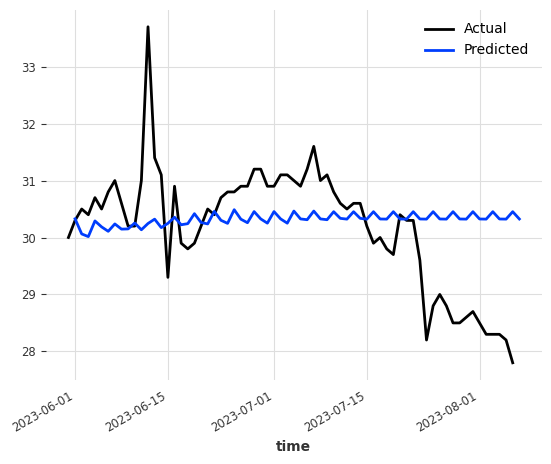

[I 2023-08-26 16:17:52,154] A new study created in memory with name: no-name-73ba88f2-f3ea-4d17-bc35-c246457690ee


---------- DONE -----------
temperature_2m_max


[I 2023-08-26 16:17:52,397] Trial 0 finished with value: 1.7216495668611054 and parameters: {'lags': [-6, -16, -7], 'model': 'XGBModel'}. Best is trial 0 with value: 1.7216495668611054.


Current value: 1.7216495668611054, Current params: {'lags': [-6, -16, -7], 'model': 'XGBModel'}
Best value: 1.7216495668611054, Best params: {'lags': [-6, -16, -7], 'model': 'XGBModel'}


[I 2023-08-26 16:17:53,109] Trial 1 finished with value: 1.6081034480380454 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.6081034480380454, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:53,365] Trial 2 finished with value: 1.6292231216136213 and parameters: {'lags': [-20, -5, -8], 'model': 'XGBModel'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.6292231216136213, Current params: {'lags': [-20, -5, -8], 'model': 'XGBModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:53,626] Trial 3 finished with value: 1.6475040775711296 and parameters: {'lags': [-17, -9, -18], 'model': 'XGBModel'}. Best is trial 1 with value: 1.6081034480380454.
[I 2023-08-26 16:17:53,689] Trial 4 finished with value: 1.8794770147399626 and parameters: {'lags': [-17, -9, -18], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.6475040775711296, Current params: {'lags': [-17, -9, -18], 'model': 'XGBModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Current value: 1.8794770147399626, Current params: {'lags': [-17, -9, -18], 'model': 'RegressionModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:54,368] Trial 5 finished with value: 1.64896338617386 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 1 with value: 1.6081034480380454.
[I 2023-08-26 16:17:54,433] Trial 6 finished with value: 2.093571051205862 and parameters: {'lags': [-6, -13, -8], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.6081034480380454.
[I 2023-08-26 16:17:54,492] Trial 7 finished with value: 1.8529381154572584 and parameters: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.64896338617386, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Current value: 2.093571051205862, Current params: {'lags': [-6, -13, -8], 'model': 'RegressionModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Current value: 1.8529381154572584, Current params: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:54,728] Trial 8 finished with value: 1.6292231216136213 and parameters: {'lags': [-20, -18, -15], 'model': 'XGBModel'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.6292231216136213, Current params: {'lags': [-20, -18, -15], 'model': 'XGBModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:54,959] Trial 9 finished with value: 1.7216495668611054 and parameters: {'lags': [-6, -13, -8], 'model': 'XGBModel'}. Best is trial 1 with value: 1.6081034480380454.


Current value: 1.7216495668611054, Current params: {'lags': [-6, -13, -8], 'model': 'XGBModel'}
Best value: 1.6081034480380454, Best params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}


[I 2023-08-26 16:17:55,646] Trial 10 finished with value: 1.6001297655834492 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 10 with value: 1.6001297655834492.


Current value: 1.6001297655834492, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.6001297655834492, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:17:56,296] Trial 11 finished with value: 1.6070563788215935 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 10 with value: 1.6001297655834492.


Current value: 1.6070563788215935, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.6001297655834492, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:17:56,975] Trial 12 finished with value: 1.6266585888733842 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 10 with value: 1.6001297655834492.


Current value: 1.6266585888733842, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.6001297655834492, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:17:58,200] Trial 13 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 10 with value: 1.6001297655834492.
[I 2023-08-26 16:17:58,359] Trial 14 finished with value: 1.6734002303203086 and parameters: {'lags': [-5, -9, -9], 'model': 'LightGBMModel'}. Best is trial 10 with value: 1.6001297655834492.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.6001297655834492, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4894, number of used features: 1
[LightGBM] [Info] Start training from score 0.001419
Current value: 1.6734002303203086, Current params: {'lags': [-5, -9, -9], 'model': 'LightGBMModel'}
Best value: 1.6001297655834492, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:17:59,044] Trial 15 finished with value: 1.5839585555091853 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 15 with value: 1.5839585555091853.


Current value: 1.5839585555091853, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:17:59,754] Trial 16 finished with value: 1.668344357698183 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 15 with value: 1.5839585555091853.
[I 2023-08-26 16:17:59,943] Trial 17 finished with value: 1.6335000333177088 and parameters: {'lags': [-20, -5, -12], 'model': 'LightGBMModel'}. Best is trial 15 with value: 1.5839585555091853.


Current value: 1.668344357698183, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4879, number of used features: 1
[LightGBM] [Info] Start training from score 0.005868
Current value: 1.6335000333177088, Current params: {'lags': [-20, -5, -12], 'model': 'LightGBMModel'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:02,289] Trial 18 finished with value: 1.6941610937609086 and parameters: {'lags': [-9, -9, -5], 'model': 'CatBoostModel'}. Best is trial 15 with value: 1.5839585555091853.


Current value: 1.6941610937609086, Current params: {'lags': [-9, -9, -5], 'model': 'CatBoostModel'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:03,383] Trial 19 finished with value: 1.5996241508989897 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 15 with value: 1.5839585555091853.


Current value: 1.5996241508989897, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:04,417] Trial 20 finished with value: 1.6026575946839003 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 15 with value: 1.5839585555091853.


Current value: 1.6026575946839003, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5839585555091853, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:05,514] Trial 21 finished with value: 1.5614767734747725 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5614767734747725, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:06,633] Trial 22 finished with value: 1.607198861260865 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.607198861260865, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:07,361] Trial 23 finished with value: 1.5937752022790315 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5937752022790315, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:08,013] Trial 24 finished with value: 1.6166955493018007 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6166955493018007, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:09,245] Trial 25 finished with value: 1.6722409903927935 and parameters: {'lags': [-5, -9, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6722409903927935, Current params: {'lags': [-5, -9, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:09,863] Trial 26 finished with value: 1.646067558473655 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:10,016] Trial 27 finished with value: 1.6335000333177088 and parameters: {'lags': [-20, -3, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.646067558473655, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4879, number of used features: 1
[LightGBM] [Info] Start training from score 0.005868
Current value: 1.6335000333177088, Current params: {'lags': [-20, -3, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:10,685] Trial 28 finished with value: 1.726204636031686 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.726204636031686, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:11,342] Trial 29 finished with value: 1.7010499325411526 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7010499325411526, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:11,985] Trial 30 finished with value: 1.7063295665448819 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7063295665448819, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:12,667] Trial 31 finished with value: 1.585321386677803 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.585321386677803, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:13,328] Trial 32 finished with value: 1.6327840374463267 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6327840374463267, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:13,967] Trial 33 finished with value: 1.6018958142772648 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6018958142772648, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:14,608] Trial 34 finished with value: 1.6031396287658488 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:14,664] Trial 35 finished with value: 1.8574085069675497 and parameters: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6031396287658488, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8574085069675497, Current params: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:15,297] Trial 36 finished with value: 1.6332843824898087 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6332843824898087, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:15,543] Trial 37 finished with value: 1.6475040775711296 and parameters: {'lags': [-17, -9, -18], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6475040775711296, Current params: {'lags': [-17, -9, -18], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:16,770] Trial 38 finished with value: 1.7388097938258318 and parameters: {'lags': [-6, -13, -8], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:16,861] Trial 39 finished with value: 1.8529381154572584 and parameters: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7388097938258318, Current params: {'lags': [-6, -13, -8], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8529381154572584, Current params: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 1
[LightGBM] [Info] Start training from score 0.005124


[I 2023-08-26 16:18:17,097] Trial 40 finished with value: 1.6467861507472366 and parameters: {'lags': [-17, -9, -18], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6467861507472366, Current params: {'lags': [-17, -9, -18], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:18,200] Trial 41 finished with value: 1.6026585597004024 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6026585597004024, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:19,244] Trial 42 finished with value: 1.6079939265833139 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6079939265833139, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:20,270] Trial 43 finished with value: 1.6043132074272282 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6043132074272282, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:21,290] Trial 44 finished with value: 1.6347122804631233 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6347122804631233, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:21,672] Trial 45 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:22,713] Trial 46 finished with value: 1.6254981453075736 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6254981453075736, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:23,686] Trial 47 finished with value: 1.627525801971338 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:23,744] Trial 48 finished with value: 2.1281220364017446 and parameters: {'lags': [-5, -9, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.627525801971338, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 2.1281220364017446, Current params: {'lags': [-5, -9, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:24,397] Trial 49 finished with value: 1.7085908519766055 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7085908519766055, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:25,036] Trial 50 finished with value: 1.633383985463894 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.633383985463894, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:25,703] Trial 51 finished with value: 1.6112748584097614 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6112748584097614, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:26,381] Trial 52 finished with value: 1.581354120110643 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.581354120110643, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:27,032] Trial 53 finished with value: 1.6093903894652788 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6093903894652788, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:27,702] Trial 54 finished with value: 1.6431932601526096 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6431932601526096, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:27,932] Trial 55 finished with value: 1.6292231216136213 and parameters: {'lags': [-20, -5, -8], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6292231216136213, Current params: {'lags': [-20, -5, -8], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:28,578] Trial 56 finished with value: 1.7796575185632169 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7796575185632169, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:29,773] Trial 57 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:29,935] Trial 58 finished with value: 1.6315401731641088 and parameters: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 1
[LightGBM] [Info] Start training from score 0.005390
Current value: 1.6315401731641088, Current params: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:30,537] Trial 59 finished with value: 1.705285854570692 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.705285854570692, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:31,155] Trial 60 finished with value: 1.6105885298276168 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6105885298276168, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:31,768] Trial 61 finished with value: 1.6074436011832174 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6074436011832174, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:32,416] Trial 62 finished with value: 1.6059229272889068 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6059229272889068, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:33,052] Trial 63 finished with value: 1.62286686248562 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.62286686248562, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:33,761] Trial 64 finished with value: 1.6114293056879123 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6114293056879123, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:34,811] Trial 65 finished with value: 1.6497829148579302 and parameters: {'lags': [-5, -9, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6497829148579302, Current params: {'lags': [-5, -9, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:35,890] Trial 66 finished with value: 1.5906618942544553 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5906618942544553, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:36,929] Trial 67 finished with value: 1.6170419542056413 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:37,018] Trial 68 finished with value: 1.8529381154572584 and parameters: {'lags': [-20, -3, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6170419542056413, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8529381154572584, Current params: {'lags': [-20, -3, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:39,966] Trial 69 finished with value: 1.6396606581891513 and parameters: {'lags': [-20, -5, -12], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6396606581891513, Current params: {'lags': [-20, -5, -12], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 1
[LightGBM] [Info] Start training from score 0.005124


[I 2023-08-26 16:18:40,224] Trial 70 finished with value: 1.6467861507472366 and parameters: {'lags': [-17, -9, -18], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6467861507472366, Current params: {'lags': [-17, -9, -18], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:41,052] Trial 71 finished with value: 1.6325593329892356 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6325593329892356, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:42,140] Trial 72 finished with value: 1.6056230872479373 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6056230872479373, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:43,226] Trial 73 finished with value: 1.6433036812721435 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6433036812721435, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:44,319] Trial 74 finished with value: 1.703322818920349 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.703322818920349, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:45,364] Trial 75 finished with value: 1.652815981529015 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.652815981529015, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:45,749] Trial 76 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:46,817] Trial 77 finished with value: 1.673632243690582 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.673632243690582, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:47,795] Trial 78 finished with value: 1.706097568005581 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.706097568005581, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:48,516] Trial 79 finished with value: 1.6308656159509998 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6308656159509998, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:49,197] Trial 80 finished with value: 1.6149419751522196 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6149419751522196, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:49,902] Trial 81 finished with value: 1.579534852324219 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.579534852324219, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:51,007] Trial 82 finished with value: 1.6133861300295644 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6133861300295644, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:52,140] Trial 83 finished with value: 1.6082223614882338 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6082223614882338, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:53,368] Trial 84 finished with value: 1.6140326481440725 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:18:53,479] Trial 85 finished with value: 1.8574085069675497 and parameters: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6140326481440725, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8574085069675497, Current params: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:54,759] Trial 86 finished with value: 1.6687203997045459 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6687203997045459, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:57,236] Trial 87 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:58,461] Trial 88 finished with value: 1.6251401373711403 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6251401373711403, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4894, number of used features: 1
[LightGBM] [Info] Start training from score 0.001419


[I 2023-08-26 16:18:58,746] Trial 89 finished with value: 1.6734002303203086 and parameters: {'lags': [-5, -9, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6734002303203086, Current params: {'lags': [-5, -9, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:18:59,895] Trial 90 finished with value: 1.655824195550155 and parameters: {'lags': [-17, -9, -18], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.655824195550155, Current params: {'lags': [-17, -9, -18], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:01,009] Trial 91 finished with value: 1.622766783063674 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.622766783063674, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:02,147] Trial 92 finished with value: 1.6682902805811035 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6682902805811035, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:03,078] Trial 93 finished with value: 1.6119067751852418 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6119067751852418, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:03,716] Trial 94 finished with value: 1.6104086536819069 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6104086536819069, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:03,968] Trial 95 finished with value: 1.6292231216136213 and parameters: {'lags': [-20, -3, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6292231216136213, Current params: {'lags': [-20, -3, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:04,614] Trial 96 finished with value: 1.6330969337374772 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6330969337374772, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:05,280] Trial 97 finished with value: 1.5889529585143976 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5889529585143976, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:05,959] Trial 98 finished with value: 1.5958178726029069 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5958178726029069, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:06,632] Trial 99 finished with value: 1.592881689605185 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.592881689605185, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:07,282] Trial 100 finished with value: 1.6034238047500844 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6034238047500844, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:07,937] Trial 101 finished with value: 1.622159929387691 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.622159929387691, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:08,593] Trial 102 finished with value: 1.5992545952710358 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5992545952710358, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:09,260] Trial 103 finished with value: 1.5893310456629532 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5893310456629532, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:09,897] Trial 104 finished with value: 1.6059984017177005 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6059984017177005, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:10,573] Trial 105 finished with value: 1.7059992608983818 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7059992608983818, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:11,247] Trial 106 finished with value: 1.6922805002376433 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6922805002376433, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:11,895] Trial 107 finished with value: 1.6077599992121638 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:19:11,952] Trial 108 finished with value: 1.8529381154572584 and parameters: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6077599992121638, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8529381154572584, Current params: {'lags': [-20, -5, -8], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:12,609] Trial 109 finished with value: 1.603928012477105 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.603928012477105, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:13,654] Trial 110 finished with value: 1.7122685108501727 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7122685108501727, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:14,689] Trial 111 finished with value: 1.6181957625643804 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6181957625643804, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:15,750] Trial 112 finished with value: 1.6165420921962748 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6165420921962748, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:16,829] Trial 113 finished with value: 1.5909373553421933 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5909373553421933, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:17,916] Trial 114 finished with value: 1.627450863091393 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.627450863091393, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:20,015] Trial 115 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:20,667] Trial 116 finished with value: 1.6091771689680732 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:19:20,834] Trial 117 finished with value: 1.6315401731641088 and parameters: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6091771689680732, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 1
[LightGBM] [Info] Start training from score 0.005390
Current value: 1.6315401731641088, Current params: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:21,542] Trial 118 finished with value: 1.6652787496821986 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6652787496821986, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:21,778] Trial 119 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:22,431] Trial 120 finished with value: 1.6090794242984676 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6090794242984676, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:23,126] Trial 121 finished with value: 1.6006693142451303 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6006693142451303, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:23,805] Trial 122 finished with value: 1.6022410506201912 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6022410506201912, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:24,481] Trial 123 finished with value: 1.5965298869937492 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5965298869937492, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:25,187] Trial 124 finished with value: 1.6348966132066285 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6348966132066285, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:25,858] Trial 125 finished with value: 1.6403522214298416 and parameters: {'lags': [-5, -9, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6403522214298416, Current params: {'lags': [-5, -9, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:26,540] Trial 126 finished with value: 1.650958197806755 and parameters: {'lags': [-17, -9, -18], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.650958197806755, Current params: {'lags': [-17, -9, -18], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:27,194] Trial 127 finished with value: 1.5795258633745881 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5795258633745881, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:27,874] Trial 128 finished with value: 1.6358288954601456 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6358288954601456, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:28,573] Trial 129 finished with value: 1.6155215913088614 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6155215913088614, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:29,254] Trial 130 finished with value: 1.6652653597940898 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6652653597940898, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:30,237] Trial 131 finished with value: 1.611495671873974 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.611495671873974, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:31,284] Trial 132 finished with value: 1.580042711860164 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.580042711860164, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:32,388] Trial 133 finished with value: 1.6096967614507436 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6096967614507436, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:33,439] Trial 134 finished with value: 1.6312271418598998 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6312271418598998, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:34,518] Trial 135 finished with value: 1.6149806555205617 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6149806555205617, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:35,599] Trial 136 finished with value: 1.6118552812402536 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:19:35,698] Trial 137 finished with value: 1.9437133643717202 and parameters: {'lags': [-9, -9, -5], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6118552812402536, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.9437133643717202, Current params: {'lags': [-9, -9, -5], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:36,579] Trial 138 finished with value: 1.7418490673607088 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7418490673607088, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:37,247] Trial 139 finished with value: 1.5868242238479067 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5868242238479067, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:38,464] Trial 140 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:39,137] Trial 141 finished with value: 1.601909205701575 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.601909205701575, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:39,836] Trial 142 finished with value: 1.6277294821147228 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6277294821147228, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:40,558] Trial 143 finished with value: 1.6309734357738486 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6309734357738486, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:41,272] Trial 144 finished with value: 1.611506279876499 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.611506279876499, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:41,961] Trial 145 finished with value: 1.6410955441620798 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:19:42,148] Trial 146 finished with value: 1.6315401731641088 and parameters: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6410955441620798, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 1
[LightGBM] [Info] Start training from score 0.005390
Current value: 1.6315401731641088, Current params: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:42,835] Trial 147 finished with value: 1.608502688944864 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.608502688944864, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:43,516] Trial 148 finished with value: 1.6917473222387507 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6917473222387507, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:44,172] Trial 149 finished with value: 1.6356321333176416 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6356321333176416, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:44,420] Trial 150 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:45,058] Trial 151 finished with value: 1.598676784025018 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.598676784025018, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:45,710] Trial 152 finished with value: 1.6143811513348552 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6143811513348552, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:46,399] Trial 153 finished with value: 1.6135986816258736 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6135986816258736, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:47,555] Trial 154 finished with value: 1.6166098537129523 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6166098537129523, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:48,681] Trial 155 finished with value: 1.6085049236006308 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6085049236006308, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:49,772] Trial 156 finished with value: 1.6593526599111614 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6593526599111614, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:50,866] Trial 157 finished with value: 1.6367104310657257 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6367104310657257, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:51,980] Trial 158 finished with value: 1.6157421040305515 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6157421040305515, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:53,090] Trial 159 finished with value: 1.6274558602682374 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6274558602682374, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:53,843] Trial 160 finished with value: 1.6471656322525756 and parameters: {'lags': [-5, -9, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6471656322525756, Current params: {'lags': [-5, -9, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:54,531] Trial 161 finished with value: 1.6284649381365637 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6284649381365637, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:55,243] Trial 162 finished with value: 1.609442157994394 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.609442157994394, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:55,921] Trial 163 finished with value: 1.5826994157216996 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5826994157216996, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:56,608] Trial 164 finished with value: 1.5995570245547512 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5995570245547512, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:57,307] Trial 165 finished with value: 1.6255364573486966 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6255364573486966, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:57,987] Trial 166 finished with value: 1.5935864073611044 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5935864073611044, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:58,667] Trial 167 finished with value: 1.6405944570109003 and parameters: {'lags': [-17, -9, -18], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6405944570109003, Current params: {'lags': [-17, -9, -18], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:19:59,320] Trial 168 finished with value: 1.631601452117528 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:19:59,393] Trial 169 finished with value: 1.8574085069675497 and parameters: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.631601452117528, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8574085069675497, Current params: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:00,056] Trial 170 finished with value: 1.605033819685091 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.605033819685091, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:00,791] Trial 171 finished with value: 1.6693296493814185 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6693296493814185, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:01,554] Trial 172 finished with value: 1.6189744821099539 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6189744821099539, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:02,254] Trial 173 finished with value: 1.6078737348114311 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6078737348114311, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:02,947] Trial 174 finished with value: 1.6041662834443255 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6041662834443255, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:05,379] Trial 175 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:06,528] Trial 176 finished with value: 1.7478274773836033 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7478274773836033, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:07,674] Trial 177 finished with value: 1.6097514106748958 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6097514106748958, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4893, number of used features: 1
[LightGBM] [Info] Start training from score 0.001779


[I 2023-08-26 16:20:07,950] Trial 178 finished with value: 1.7491078759276855 and parameters: {'lags': [-6, -13, -8], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7491078759276855, Current params: {'lags': [-6, -13, -8], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:09,103] Trial 179 finished with value: 1.5726655730135293 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5726655730135293, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:10,189] Trial 180 finished with value: 1.6050434635451103 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6050434635451103, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:10,891] Trial 181 finished with value: 1.6132089026715928 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6132089026715928, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:11,570] Trial 182 finished with value: 1.6185959430404762 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6185959430404762, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:12,252] Trial 183 finished with value: 1.596212882704858 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.596212882704858, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:12,946] Trial 184 finished with value: 1.604211120915058 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.604211120915058, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:13,624] Trial 185 finished with value: 1.675708423297574 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.675708423297574, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:13,881] Trial 186 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:14,630] Trial 187 finished with value: 1.6109967808003558 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6109967808003558, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:15,314] Trial 188 finished with value: 1.6598575980739423 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6598575980739423, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:16,006] Trial 189 finished with value: 1.613052960569815 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.613052960569815, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:16,711] Trial 190 finished with value: 1.6265417503812594 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6265417503812594, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:17,422] Trial 191 finished with value: 1.602104954623124 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.602104954623124, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:18,160] Trial 192 finished with value: 1.628683293595955 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.628683293595955, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:18,848] Trial 193 finished with value: 1.5965301858098084 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5965301858098084, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:19,555] Trial 194 finished with value: 1.6297584200284716 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6297584200284716, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:20,387] Trial 195 finished with value: 1.5991138653997197 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5991138653997197, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:21,593] Trial 196 finished with value: 1.6074864990952533 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6074864990952533, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:22,738] Trial 197 finished with value: 1.662049176957607 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.662049176957607, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:23,958] Trial 198 finished with value: 1.6054478676348345 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6054478676348345, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:25,159] Trial 199 finished with value: 1.6123851237148195 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6123851237148195, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:26,293] Trial 200 finished with value: 1.6107375350085442 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6107375350085442, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:27,347] Trial 201 finished with value: 1.62090340896651 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.62090340896651, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:28,075] Trial 202 finished with value: 1.602377045534648 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.602377045534648, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:28,748] Trial 203 finished with value: 1.5968865240355075 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5968865240355075, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:29,430] Trial 204 finished with value: 1.6259954608663967 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6259954608663967, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:30,093] Trial 205 finished with value: 1.6116354709544864 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:20:30,158] Trial 206 finished with value: 2.1281220364017446 and parameters: {'lags': [-5, -9, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6116354709544864, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 2.1281220364017446, Current params: {'lags': [-5, -9, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:30,805] Trial 207 finished with value: 1.6312715876506736 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6312715876506736, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:31,471] Trial 208 finished with value: 1.632059381134352 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.632059381134352, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:32,142] Trial 209 finished with value: 1.625475903490275 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.625475903490275, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:33,387] Trial 210 finished with value: 1.6186427842924243 and parameters: {'lags': [-17, -9, -18], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6186427842924243, Current params: {'lags': [-17, -9, -18], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:34,067] Trial 211 finished with value: 1.5933088575626715 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5933088575626715, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:34,738] Trial 212 finished with value: 1.6049548474429334 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6049548474429334, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:35,409] Trial 213 finished with value: 1.608011720540683 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.608011720540683, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:36,057] Trial 214 finished with value: 1.6095998422021236 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6095998422021236, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:36,713] Trial 215 finished with value: 1.5957016842104301 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5957016842104301, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:37,505] Trial 216 finished with value: 1.604409225661835 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.604409225661835, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:38,600] Trial 217 finished with value: 1.618269578685436 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.618269578685436, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4879, number of used features: 1
[LightGBM] [Info] Start training from score 0.005868


[I 2023-08-26 16:20:38,874] Trial 218 finished with value: 1.6335000333177088 and parameters: {'lags': [-20, -5, -12], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6335000333177088, Current params: {'lags': [-20, -5, -12], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:39,950] Trial 219 finished with value: 1.6095264459461878 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6095264459461878, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:41,022] Trial 220 finished with value: 1.650825262286239 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.650825262286239, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:42,101] Trial 221 finished with value: 1.6278947228206588 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6278947228206588, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:43,171] Trial 222 finished with value: 1.6023317946174878 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6023317946174878, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:44,237] Trial 223 finished with value: 1.6319344377900158 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6319344377900158, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:44,941] Trial 224 finished with value: 1.6003305939004033 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6003305939004033, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:45,643] Trial 225 finished with value: 1.5964785700195379 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5964785700195379, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:46,353] Trial 226 finished with value: 1.6811818542822319 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6811818542822319, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:47,043] Trial 227 finished with value: 1.6243837370279155 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6243837370279155, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:47,764] Trial 228 finished with value: 1.611793228375311 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.611793228375311, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:48,017] Trial 229 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:48,703] Trial 230 finished with value: 1.6971545109158217 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6971545109158217, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:49,362] Trial 231 finished with value: 1.6120166466807617 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6120166466807617, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:50,085] Trial 232 finished with value: 1.6050550109307682 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6050550109307682, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:50,814] Trial 233 finished with value: 1.5976559730076167 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5976559730076167, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:51,517] Trial 234 finished with value: 1.6161312413639837 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6161312413639837, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:52,186] Trial 235 finished with value: 1.593650825839269 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.593650825839269, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:52,878] Trial 236 finished with value: 1.6585266468866149 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6585266468866149, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:53,570] Trial 237 finished with value: 1.6068306029739257 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6068306029739257, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:54,305] Trial 238 finished with value: 1.5748972928014089 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5748972928014089, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:55,424] Trial 239 finished with value: 1.6129507821629507 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6129507821629507, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:56,533] Trial 240 finished with value: 1.613987167164971 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.613987167164971, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:57,646] Trial 241 finished with value: 1.5994421210497731 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5994421210497731, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:58,783] Trial 242 finished with value: 1.6021201723183294 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6021201723183294, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:20:59,866] Trial 243 finished with value: 1.6119391751191565 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6119391751191565, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:00,969] Trial 244 finished with value: 1.6383754601612623 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6383754601612623, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:01,656] Trial 245 finished with value: 1.6124187141267285 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6124187141267285, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:02,364] Trial 246 finished with value: 1.6113340410704566 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6113340410704566, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:03,025] Trial 247 finished with value: 1.5905208045971992 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5905208045971992, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:03,698] Trial 248 finished with value: 1.6619610765551924 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6619610765551924, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:04,388] Trial 249 finished with value: 1.617445318817777 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:21:04,456] Trial 250 finished with value: 1.8574085069675497 and parameters: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.617445318817777, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8574085069675497, Current params: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:05,125] Trial 251 finished with value: 1.6155594896323027 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6155594896323027, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:05,818] Trial 252 finished with value: 1.603206151577082 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.603206151577082, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:06,507] Trial 253 finished with value: 1.618744275451008 and parameters: {'lags': [-5, -9, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.618744275451008, Current params: {'lags': [-5, -9, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:07,744] Trial 254 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:08,425] Trial 255 finished with value: 1.6014591897362542 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6014591897362542, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:09,120] Trial 256 finished with value: 1.6423565661610706 and parameters: {'lags': [-17, -9, -18], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6423565661610706, Current params: {'lags': [-17, -9, -18], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:09,797] Trial 257 finished with value: 1.6116799279259275 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:21:09,972] Trial 258 finished with value: 1.6315401731641088 and parameters: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6116799279259275, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 1
[LightGBM] [Info] Start training from score 0.005390
Current value: 1.6315401731641088, Current params: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:10,703] Trial 259 finished with value: 1.6037601049738388 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6037601049738388, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:11,629] Trial 260 finished with value: 1.6717336159793035 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6717336159793035, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:12,789] Trial 261 finished with value: 1.6169493417168974 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6169493417168974, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:13,948] Trial 262 finished with value: 1.6534872246317684 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6534872246317684, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:14,362] Trial 263 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:15,472] Trial 264 finished with value: 1.5931120409018797 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5931120409018797, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:16,584] Trial 265 finished with value: 1.6220500048378808 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6220500048378808, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:17,702] Trial 266 finished with value: 1.6084536044894113 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6084536044894113, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:18,462] Trial 267 finished with value: 1.6118180291191344 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6118180291191344, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:19,181] Trial 268 finished with value: 1.6861689905097565 and parameters: {'lags': [-6, -13, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6861689905097565, Current params: {'lags': [-6, -13, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:19,865] Trial 269 finished with value: 1.7933651065045597 and parameters: {'lags': [-9, -9, -5], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.7933651065045597, Current params: {'lags': [-9, -9, -5], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:20,536] Trial 270 finished with value: 1.6136308220343791 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6136308220343791, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:21,206] Trial 271 finished with value: 1.5848231049330734 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5848231049330734, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:21,865] Trial 272 finished with value: 1.6156026594230646 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6156026594230646, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:22,580] Trial 273 finished with value: 1.6841690430696503 and parameters: {'lags': [-6, -16, -7], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6841690430696503, Current params: {'lags': [-6, -16, -7], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:23,298] Trial 274 finished with value: 1.6344986313257628 and parameters: {'lags': [-20, -5, -8], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6344986313257628, Current params: {'lags': [-20, -5, -8], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:24,005] Trial 275 finished with value: 1.6013200408615058 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.
[I 2023-08-26 16:21:24,094] Trial 276 finished with value: 1.8574085069675497 and parameters: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6013200408615058, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Current value: 1.8574085069675497, Current params: {'lags': [-18, -13, -9], 'model': 'RegressionModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:24,825] Trial 277 finished with value: 1.6309382881914876 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6309382881914876, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:25,567] Trial 278 finished with value: 1.6475563808702203 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6475563808702203, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:26,306] Trial 279 finished with value: 1.613365135675049 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.613365135675049, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:27,544] Trial 280 finished with value: 1.61273521733209 and parameters: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.61273521733209, Current params: {'lags': [-18, -13, -9], 'model': 'CatBoostModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:28,416] Trial 281 finished with value: 1.6206197779750349 and parameters: {'lags': [-20, -18, -15], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6206197779750349, Current params: {'lags': [-20, -18, -15], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:29,594] Trial 282 finished with value: 1.5956480392315497 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5956480392315497, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:30,730] Trial 283 finished with value: 1.595840292837597 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.595840292837597, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:31,851] Trial 284 finished with value: 1.6140541508141322 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6140541508141322, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 4881, number of used features: 1
[LightGBM] [Info] Start training from score 0.005390


[I 2023-08-26 16:21:32,139] Trial 285 finished with value: 1.6315401731641088 and parameters: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6315401731641088, Current params: {'lags': [-18, -13, -9], 'model': 'LightGBMModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:33,298] Trial 286 finished with value: 1.594809943995607 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.594809943995607, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:34,451] Trial 287 finished with value: 1.5992247408287326 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.5992247408287326, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:35,410] Trial 288 finished with value: 1.6189912078222168 and parameters: {'lags': [-5, -9, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6189912078222168, Current params: {'lags': [-5, -9, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:36,134] Trial 289 finished with value: 1.6008335857537308 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6008335857537308, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:36,414] Trial 290 finished with value: 1.6042779097949562 and parameters: {'lags': [-18, -13, -9], 'model': 'XGBModel'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6042779097949562, Current params: {'lags': [-18, -13, -9], 'model': 'XGBModel'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:37,150] Trial 291 finished with value: 1.6900808078461933 and parameters: {'lags': [-17, -9, -18], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6900808078461933, Current params: {'lags': [-17, -9, -18], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:37,882] Trial 292 finished with value: 1.658940553981591 and parameters: {'lags': [-20, -3, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.658940553981591, Current params: {'lags': [-20, -3, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:38,596] Trial 293 finished with value: 1.6041208563010003 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6041208563010003, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:39,307] Trial 294 finished with value: 1.6270626230288845 and parameters: {'lags': [-20, -5, -12], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6270626230288845, Current params: {'lags': [-20, -5, -12], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:40,022] Trial 295 finished with value: 1.626143875929627 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.626143875929627, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:40,816] Trial 296 finished with value: 1.6032896528340184 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6032896528340184, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:41,546] Trial 297 finished with value: 1.6140586205216931 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6140586205216931, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:42,320] Trial 298 finished with value: 1.632173560021383 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.632173560021383, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:43,044] Trial 299 finished with value: 1.6104747866531606 and parameters: {'lags': [-18, -13, -9], 'model': 'RandomForest'}. Best is trial 21 with value: 1.5614767734747725.


Current value: 1.6104747866531606, Current params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
Best value: 1.5614767734747725, Best params: {'lags': [-18, -13, -9], 'model': 'RandomForest'}
1.6317313828415818
RMSE =  1.8644935444055568  


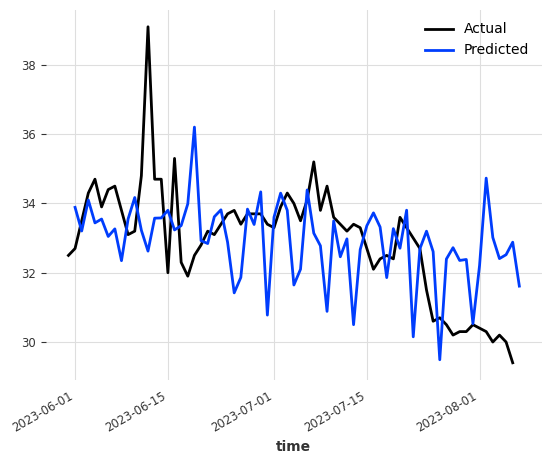

[I 2023-08-26 16:21:46,368] A new study created in memory with name: no-name-53093832-5d10-4703-8843-ab7dde043b88


---------- DONE -----------
temperature_2m_min


[I 2023-08-26 16:21:49,435] Trial 0 finished with value: 1.2786458950138386 and parameters: {'lags': [-17, -15, -12], 'model': 'CatBoostModel'}. Best is trial 0 with value: 1.2786458950138386.


Current value: 1.2786458950138386, Current params: {'lags': [-17, -15, -12], 'model': 'CatBoostModel'}
Best value: 1.2786458950138386, Best params: {'lags': [-17, -15, -12], 'model': 'CatBoostModel'}


[I 2023-08-26 16:21:49,861] Trial 1 finished with value: 1.2596194115365922 and parameters: {'lags': [-14, -10, -18], 'model': 'XGBModel'}. Best is trial 1 with value: 1.2596194115365922.
[I 2023-08-26 16:21:49,962] Trial 2 finished with value: 1.857390072717006 and parameters: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}. Best is trial 1 with value: 1.2596194115365922.


Current value: 1.2596194115365922, Current params: {'lags': [-14, -10, -18], 'model': 'XGBModel'}
Best value: 1.2596194115365922, Best params: {'lags': [-14, -10, -18], 'model': 'XGBModel'}
Current value: 1.857390072717006, Current params: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}
Best value: 1.2596194115365922, Best params: {'lags': [-14, -10, -18], 'model': 'XGBModel'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4895, number of used features: 1
[LightGBM] [Info] Start training from score 0.001203


[I 2023-08-26 16:21:50,257] Trial 3 finished with value: 1.2783523726218327 and parameters: {'lags': [-4, -13, -4], 'model': 'LightGBMModel'}. Best is trial 1 with value: 1.2596194115365922.


Current value: 1.2783523726218327, Current params: {'lags': [-4, -13, -4], 'model': 'LightGBMModel'}
Best value: 1.2596194115365922, Best params: {'lags': [-14, -10, -18], 'model': 'XGBModel'}


[I 2023-08-26 16:21:52,549] Trial 4 finished with value: 1.0997322793724769 and parameters: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}. Best is trial 4 with value: 1.0997322793724769.


Current value: 1.0997322793724769, Current params: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}
Best value: 1.0997322793724769, Best params: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}


[I 2023-08-26 16:21:53,259] Trial 5 finished with value: 1.1776360029485127 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 4 with value: 1.0997322793724769.


Current value: 1.1776360029485127, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 1.0997322793724769, Best params: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}


[I 2023-08-26 16:21:54,617] Trial 6 finished with value: 1.2786458950138386 and parameters: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}. Best is trial 4 with value: 1.0997322793724769.


Current value: 1.2786458950138386, Current params: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}
Best value: 1.0997322793724769, Best params: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}


[I 2023-08-26 16:21:54,881] Trial 7 finished with value: 1.2041646122405336 and parameters: {'lags': [-8, -12, -17], 'model': 'XGBModel'}. Best is trial 4 with value: 1.0997322793724769.


Current value: 1.2041646122405336, Current params: {'lags': [-8, -12, -17], 'model': 'XGBModel'}
Best value: 1.0997322793724769, Best params: {'lags': [-8, -12, -17], 'model': 'CatBoostModel'}


[I 2023-08-26 16:21:55,659] Trial 8 finished with value: 0.9987996703094253 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 8 with value: 0.9987996703094253.
[I 2023-08-26 16:21:55,838] Trial 9 finished with value: 1.2757933622629305 and parameters: {'lags': [-17, -4, -5], 'model': 'LightGBMModel'}. Best is trial 8 with value: 0.9987996703094253.


Current value: 0.9987996703094253, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9987996703094253, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 1
[LightGBM] [Info] Start training from score 0.005386
Current value: 1.2757933622629305, Current params: {'lags': [-17, -4, -5], 'model': 'LightGBMModel'}
Best value: 0.9987996703094253, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:56,608] Trial 10 finished with value: 1.0046907266925245 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 8 with value: 0.9987996703094253.


Current value: 1.0046907266925245, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9987996703094253, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:57,297] Trial 11 finished with value: 0.993357488682941 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 0.993357488682941, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:57,991] Trial 12 finished with value: 1.009400850239658 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.009400850239658, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:58,671] Trial 13 finished with value: 1.0068927665075245 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.0068927665075245, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:21:59,385] Trial 14 finished with value: 1.1802906287672434 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.
[I 2023-08-26 16:21:59,448] Trial 15 finished with value: 1.8599832307392423 and parameters: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.1802906287672434, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.8599832307392423, Current params: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:00,149] Trial 16 finished with value: 1.2834429433246857 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.2834429433246857, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:00,878] Trial 17 finished with value: 1.0141304959108766 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.0141304959108766, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:01,637] Trial 18 finished with value: 1.0160654424695912 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.
[I 2023-08-26 16:22:01,719] Trial 19 finished with value: 1.8599832307392423 and parameters: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.0160654424695912, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.8599832307392423, Current params: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4893, number of used features: 1
[LightGBM] [Info] Start training from score 0.001743


[I 2023-08-26 16:22:01,932] Trial 20 finished with value: 1.1743598506824682 and parameters: {'lags': [-6, -16, -11], 'model': 'LightGBMModel'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.1743598506824682, Current params: {'lags': [-6, -16, -11], 'model': 'LightGBMModel'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:03,071] Trial 21 finished with value: 1.0021831979507763 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 11 with value: 0.993357488682941.


Current value: 1.0021831979507763, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.993357488682941, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:04,201] Trial 22 finished with value: 0.9799646570785875 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 0.9799646570785875, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:05,350] Trial 23 finished with value: 0.9978126450713516 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 0.9978126450713516, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:06,508] Trial 24 finished with value: 1.2855922650866018 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2855922650866018, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:06,933] Trial 25 finished with value: 1.2596194115365922 and parameters: {'lags': [-14, -10, -18], 'model': 'XGBModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2596194115365922, Current params: {'lags': [-14, -10, -18], 'model': 'XGBModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:08,151] Trial 26 finished with value: 1.382006352803377 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.382006352803377, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:09,239] Trial 27 finished with value: 1.1878347465360883 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.1878347465360883, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:09,960] Trial 28 finished with value: 1.3042490491572207 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.3042490491572207, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:11,250] Trial 29 finished with value: 1.2786458950138386 and parameters: {'lags': [-17, -15, -12], 'model': 'CatBoostModel'}. Best is trial 22 with value: 0.9799646570785875.
[I 2023-08-26 16:22:11,413] Trial 30 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2786458950138386, Current params: {'lags': [-17, -15, -12], 'model': 'CatBoostModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037
Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:12,136] Trial 31 finished with value: 1.004318591591074 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.004318591591074, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:12,857] Trial 32 finished with value: 1.0221230013087266 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0221230013087266, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:13,153] Trial 33 finished with value: 1.0157479699587115 and parameters: {'lags': [-7, -13, -9], 'model': 'XGBModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0157479699587115, Current params: {'lags': [-7, -13, -9], 'model': 'XGBModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:13,872] Trial 34 finished with value: 1.2807500506228118 and parameters: {'lags': [-14, -10, -18], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.
[I 2023-08-26 16:22:13,950] Trial 35 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2807500506228118, Current params: {'lags': [-14, -10, -18], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:15,287] Trial 36 finished with value: 1.2630942250555823 and parameters: {'lags': [-4, -13, -4], 'model': 'CatBoostModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2630942250555823, Current params: {'lags': [-4, -13, -4], 'model': 'CatBoostModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:16,012] Trial 37 finished with value: 1.3078764795072777 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.3078764795072777, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:16,719] Trial 38 finished with value: 1.0112182124742033 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0112182124742033, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:16,981] Trial 39 finished with value: 1.2041646122405336 and parameters: {'lags': [-8, -12, -17], 'model': 'XGBModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2041646122405336, Current params: {'lags': [-8, -12, -17], 'model': 'XGBModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:18,356] Trial 40 finished with value: 1.0090920418156581 and parameters: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0090920418156581, Current params: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:19,072] Trial 41 finished with value: 1.015058704790379 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.015058704790379, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:20,213] Trial 42 finished with value: 1.2994714765400612 and parameters: {'lags': [-17, -4, -5], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2994714765400612, Current params: {'lags': [-17, -4, -5], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:21,352] Trial 43 finished with value: 0.9951578385399235 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 0.9951578385399235, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:22,462] Trial 44 finished with value: 1.0212855219303312 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0212855219303312, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037


[I 2023-08-26 16:22:22,733] Trial 45 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:23,908] Trial 46 finished with value: 1.326202130934472 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.
[I 2023-08-26 16:22:24,018] Trial 47 finished with value: 1.8599832307392423 and parameters: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.326202130934472, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.8599832307392423, Current params: {'lags': [-8, -17, -4], 'model': 'RegressionModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:25,224] Trial 48 finished with value: 1.2075499744237066 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2075499744237066, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:26,433] Trial 49 finished with value: 1.2987474177742553 and parameters: {'lags': [-17, -4, -5], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2987474177742553, Current params: {'lags': [-17, -4, -5], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:27,234] Trial 50 finished with value: 1.028959521174372 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.028959521174372, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:27,956] Trial 51 finished with value: 1.0050067001113434 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0050067001113434, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:28,671] Trial 52 finished with value: 1.0125905396835377 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0125905396835377, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:29,368] Trial 53 finished with value: 1.0130194469204703 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0130194469204703, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:30,045] Trial 54 finished with value: 1.0083307039702962 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0083307039702962, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:30,797] Trial 55 finished with value: 1.279042571490882 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.279042571490882, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:31,052] Trial 56 finished with value: 1.287976011969778 and parameters: {'lags': [-17, -15, -12], 'model': 'XGBModel'}. Best is trial 22 with value: 0.9799646570785875.
[I 2023-08-26 16:22:31,217] Trial 57 finished with value: 1.2361240518892727 and parameters: {'lags': [-14, -10, -18], 'model': 'LightGBMModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.287976011969778, Current params: {'lags': [-17, -15, -12], 'model': 'XGBModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4885, number of used features: 1
[LightGBM] [Info] Start training from score 0.004290
Current value: 1.2361240518892727, Current params: {'lags': [-14, -10, -18], 'model': 'LightGBMModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:31,942] Trial 58 finished with value: 1.391353019641238 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.
[I 2023-08-26 16:22:32,016] Trial 59 finished with value: 1.857390072717006 and parameters: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.391353019641238, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.857390072717006, Current params: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:32,733] Trial 60 finished with value: 1.016718301099597 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.016718301099597, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:33,429] Trial 61 finished with value: 1.012130676298664 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.012130676298664, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:34,135] Trial 62 finished with value: 1.005660779417892 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.005660779417892, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:34,831] Trial 63 finished with value: 1.0132828078024143 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0132828078024143, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:35,523] Trial 64 finished with value: 1.0046175491699847 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0046175491699847, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:37,075] Trial 65 finished with value: 1.1932546714465098 and parameters: {'lags': [-6, -16, -11], 'model': 'CatBoostModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.1932546714465098, Current params: {'lags': [-6, -16, -11], 'model': 'CatBoostModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:38,290] Trial 66 finished with value: 1.2769862723705165 and parameters: {'lags': [-8, -17, -4], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2769862723705165, Current params: {'lags': [-8, -17, -4], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:39,441] Trial 67 finished with value: 1.0086372940629882 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0086372940629882, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:40,575] Trial 68 finished with value: 1.28092803929037 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.28092803929037, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:40,981] Trial 69 finished with value: 1.0157479699587115 and parameters: {'lags': [-7, -13, -9], 'model': 'XGBModel'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.0157479699587115, Current params: {'lags': [-7, -13, -9], 'model': 'XGBModel'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:42,131] Trial 70 finished with value: 1.2817593753733825 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 22 with value: 0.9799646570785875.


Current value: 1.2817593753733825, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.9799646570785875, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:43,294] Trial 71 finished with value: 0.965485735768702 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.965485735768702, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:44,169] Trial 72 finished with value: 1.004972879307374 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.004972879307374, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:44,883] Trial 73 finished with value: 1.0070802996855484 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0070802996855484, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:45,622] Trial 74 finished with value: 1.0110569155623732 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:22:45,799] Trial 75 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0110569155623732, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037
Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:46,545] Trial 76 finished with value: 1.198604253384533 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.198604253384533, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:47,901] Trial 77 finished with value: 1.232217284483836 and parameters: {'lags': [-14, -10, -18], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:22:47,975] Trial 78 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.232217284483836, Current params: {'lags': [-14, -10, -18], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:48,674] Trial 79 finished with value: 1.2734917377935298 and parameters: {'lags': [-17, -4, -5], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2734917377935298, Current params: {'lags': [-17, -4, -5], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:49,369] Trial 80 finished with value: 1.3906220390139024 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.3906220390139024, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:50,055] Trial 81 finished with value: 1.0118025345578268 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0118025345578268, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:50,771] Trial 82 finished with value: 1.0058314060508307 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0058314060508307, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:51,492] Trial 83 finished with value: 0.9714291919123145 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9714291919123145, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:52,209] Trial 84 finished with value: 1.0129408820686536 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0129408820686536, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:52,914] Trial 85 finished with value: 1.2907679478136516 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2907679478136516, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:53,652] Trial 86 finished with value: 1.2058457867217722 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2058457867217722, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:54,687] Trial 87 finished with value: 1.0099996855611504 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0099996855611504, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:55,873] Trial 88 finished with value: 1.044405221642933 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.044405221642933, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:56,309] Trial 89 finished with value: 1.2041646122405336 and parameters: {'lags': [-8, -17, -4], 'model': 'XGBModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2041646122405336, Current params: {'lags': [-8, -17, -4], 'model': 'XGBModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037


[I 2023-08-26 16:22:56,593] Trial 90 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:57,749] Trial 91 finished with value: 1.0080985386599395 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0080985386599395, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:22:58,953] Trial 92 finished with value: 1.0118866846667252 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0118866846667252, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:00,091] Trial 93 finished with value: 1.0073731388223028 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0073731388223028, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:01,154] Trial 94 finished with value: 0.9846462582830977 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9846462582830977, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:01,844] Trial 95 finished with value: 1.1758031936799396 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.1758031936799396, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:02,543] Trial 96 finished with value: 0.9788246756092659 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9788246756092659, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:03,262] Trial 97 finished with value: 0.9667524517620264 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:23:03,325] Trial 98 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9667524517620264, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:04,068] Trial 99 finished with value: 0.9685958641864498 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9685958641864498, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:04,761] Trial 100 finished with value: 1.0122085220828532 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0122085220828532, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:05,475] Trial 101 finished with value: 1.0144882366662358 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0144882366662358, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:06,203] Trial 102 finished with value: 1.0067231812404316 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0067231812404316, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:06,926] Trial 103 finished with value: 1.0114470378608573 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0114470378608573, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:07,821] Trial 104 finished with value: 1.30171783218901 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.30171783218901, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:09,923] Trial 105 finished with value: 1.2786458950138386 and parameters: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2786458950138386, Current params: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:11,165] Trial 106 finished with value: 1.0061767085396465 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0061767085396465, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:12,424] Trial 107 finished with value: 1.1922209463971352 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.1922209463971352, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:13,672] Trial 108 finished with value: 1.2099267875229585 and parameters: {'lags': [-14, -10, -18], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2099267875229585, Current params: {'lags': [-14, -10, -18], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:14,965] Trial 109 finished with value: 1.0130726689238239 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0130726689238239, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:16,366] Trial 110 finished with value: 1.3866261005210576 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.3866261005210576, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:17,899] Trial 111 finished with value: 1.0201308117968206 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0201308117968206, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:19,318] Trial 112 finished with value: 1.0094592234271131 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0094592234271131, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:20,875] Trial 113 finished with value: 0.990643743566335 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.990643743566335, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:22,455] Trial 114 finished with value: 1.008070486069397 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.008070486069397, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:23,957] Trial 115 finished with value: 1.0135709624754012 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0135709624754012, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:24,441] Trial 116 finished with value: 1.2851276002175418 and parameters: {'lags': [-13, -11, -3], 'model': 'XGBModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2851276002175418, Current params: {'lags': [-13, -11, -3], 'model': 'XGBModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:25,678] Trial 117 finished with value: 1.0075738023428586 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0075738023428586, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037


[I 2023-08-26 16:23:25,939] Trial 118 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:27,115] Trial 119 finished with value: 1.0067710016692906 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0067710016692906, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:28,051] Trial 120 finished with value: 1.184410646499396 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.184410646499396, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:28,802] Trial 121 finished with value: 1.0149617203462187 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0149617203462187, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:29,568] Trial 122 finished with value: 1.0121629647396917 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0121629647396917, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:30,285] Trial 123 finished with value: 1.012599630332381 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.012599630332381, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:31,008] Trial 124 finished with value: 1.2049911203720993 and parameters: {'lags': [-8, -17, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:23:31,084] Trial 125 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2049911203720993, Current params: {'lags': [-8, -17, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:31,816] Trial 126 finished with value: 1.015712204623784 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.015712204623784, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:33,195] Trial 127 finished with value: 1.0090920418156581 and parameters: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0090920418156581, Current params: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:33,925] Trial 128 finished with value: 1.2835727970433684 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2835727970433684, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:34,660] Trial 129 finished with value: 0.9668071050041169 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9668071050041169, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:35,405] Trial 130 finished with value: 1.0133404548893759 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0133404548893759, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:36,624] Trial 131 finished with value: 1.0128664392689737 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0128664392689737, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:37,777] Trial 132 finished with value: 1.0137554690627946 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0137554690627946, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:38,938] Trial 133 finished with value: 0.9764013516986548 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9764013516986548, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:40,079] Trial 134 finished with value: 1.001591601873202 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.001591601873202, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:41,202] Trial 135 finished with value: 1.0117320138338097 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0117320138338097, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:42,350] Trial 136 finished with value: 1.0084187953617967 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0084187953617967, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:43,205] Trial 137 finished with value: 1.2868481332205242 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2868481332205242, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:43,884] Trial 138 finished with value: 1.2935967430290292 and parameters: {'lags': [-17, -4, -5], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2935967430290292, Current params: {'lags': [-17, -4, -5], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:44,580] Trial 139 finished with value: 1.2325318228084758 and parameters: {'lags': [-14, -10, -18], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2325318228084758, Current params: {'lags': [-14, -10, -18], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:44,829] Trial 140 finished with value: 1.2041646122405336 and parameters: {'lags': [-8, -12, -17], 'model': 'XGBModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2041646122405336, Current params: {'lags': [-8, -12, -17], 'model': 'XGBModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:45,527] Trial 141 finished with value: 1.0149533937179982 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0149533937179982, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:46,228] Trial 142 finished with value: 1.0114946496314248 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0114946496314248, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:46,924] Trial 143 finished with value: 1.0167955531401438 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0167955531401438, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:47,659] Trial 144 finished with value: 1.0222883557737636 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0222883557737636, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:48,397] Trial 145 finished with value: 1.0190143845079869 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0190143845079869, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:49,094] Trial 146 finished with value: 1.0181777233167228 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0181777233167228, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:49,807] Trial 147 finished with value: 1.3828820416024827 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:23:49,982] Trial 148 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.3828820416024827, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037
Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:50,706] Trial 149 finished with value: 1.3059143027391285 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.3059143027391285, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:51,430] Trial 150 finished with value: 0.9659771238580139 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9659771238580139, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:52,163] Trial 151 finished with value: 1.0050099744296455 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0050099744296455, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:53,040] Trial 152 finished with value: 1.0131913475507983 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0131913475507983, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:54,257] Trial 153 finished with value: 1.0023620848141128 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0023620848141128, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:55,408] Trial 154 finished with value: 1.0184962080527988 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0184962080527988, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:56,620] Trial 155 finished with value: 1.0042312161952274 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:23:56,731] Trial 156 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0042312161952274, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:57,904] Trial 157 finished with value: 1.0113881270985698 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0113881270985698, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:23:59,033] Trial 158 finished with value: 1.0209365982490746 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0209365982490746, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:00,803] Trial 159 finished with value: 1.0997322793724769 and parameters: {'lags': [-8, -17, -4], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0997322793724769, Current params: {'lags': [-8, -17, -4], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:01,512] Trial 160 finished with value: 1.0037397831077817 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0037397831077817, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:02,236] Trial 161 finished with value: 1.004479170246028 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.004479170246028, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:02,947] Trial 162 finished with value: 1.0173891448032513 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0173891448032513, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:03,617] Trial 163 finished with value: 1.0028201702315673 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0028201702315673, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:04,293] Trial 164 finished with value: 1.0044259189624631 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0044259189624631, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:04,970] Trial 165 finished with value: 1.2506181235049687 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2506181235049687, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:05,664] Trial 166 finished with value: 1.008201206470563 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.008201206470563, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:06,384] Trial 167 finished with value: 0.9993362258349037 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9993362258349037, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:07,097] Trial 168 finished with value: 1.2141833651239404 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2141833651239404, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:07,812] Trial 169 finished with value: 1.018204774811844 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.018204774811844, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:08,530] Trial 170 finished with value: 1.003820234944638 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.003820234944638, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:09,241] Trial 171 finished with value: 1.007363062478664 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.007363062478664, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:10,081] Trial 172 finished with value: 1.0029349067868512 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0029349067868512, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:11,239] Trial 173 finished with value: 1.0203224959554755 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0203224959554755, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:12,389] Trial 174 finished with value: 0.9880871922516051 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9880871922516051, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:13,502] Trial 175 finished with value: 1.0104986188996399 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0104986188996399, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:14,635] Trial 176 finished with value: 1.284524861166416 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.284524861166416, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:15,084] Trial 177 finished with value: 1.287976011969778 and parameters: {'lags': [-17, -4, -5], 'model': 'XGBModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.287976011969778, Current params: {'lags': [-17, -4, -5], 'model': 'XGBModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:16,242] Trial 178 finished with value: 1.0119631816199282 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0119631816199282, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:17,266] Trial 179 finished with value: 1.192424547296074 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:24:17,451] Trial 180 finished with value: 1.2361240518892727 and parameters: {'lags': [-14, -10, -18], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.192424547296074, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4885, number of used features: 1
[LightGBM] [Info] Start training from score 0.004290
Current value: 1.2361240518892727, Current params: {'lags': [-14, -10, -18], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:18,121] Trial 181 finished with value: 0.9811642260289738 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9811642260289738, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:18,825] Trial 182 finished with value: 0.9835498343540977 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9835498343540977, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:19,540] Trial 183 finished with value: 0.9777464238562062 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9777464238562062, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:20,273] Trial 184 finished with value: 1.018268334950268 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.018268334950268, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:21,026] Trial 185 finished with value: 1.0193848823534633 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0193848823534633, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:21,754] Trial 186 finished with value: 1.016020704685234 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.016020704685234, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:22,453] Trial 187 finished with value: 1.0043524985540286 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0043524985540286, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:23,166] Trial 188 finished with value: 1.0123836427446216 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:24:23,231] Trial 189 finished with value: 1.857390072717006 and parameters: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0123836427446216, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.857390072717006, Current params: {'lags': [-13, -11, -3], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:23,979] Trial 190 finished with value: 1.0129895117938164 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0129895117938164, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:24,732] Trial 191 finished with value: 1.0264124118871454 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0264124118871454, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:25,450] Trial 192 finished with value: 1.3855074128235265 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.3855074128235265, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:26,231] Trial 193 finished with value: 1.0092057911202788 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0092057911202788, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:26,983] Trial 194 finished with value: 1.0077376470886046 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0077376470886046, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:28,048] Trial 195 finished with value: 1.0016441730764913 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0016441730764913, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:31,099] Trial 196 finished with value: 1.0090920418156581 and parameters: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0090920418156581, Current params: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:32,260] Trial 197 finished with value: 1.0108884982219688 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0108884982219688, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:33,436] Trial 198 finished with value: 0.9894495020682681 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9894495020682681, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:34,318] Trial 199 finished with value: 1.0080782726793787 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0080782726793787, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:35,017] Trial 200 finished with value: 1.0047793002489265 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0047793002489265, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:35,731] Trial 201 finished with value: 1.02391874180075 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.02391874180075, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:36,462] Trial 202 finished with value: 0.9833134049874641 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9833134049874641, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:37,196] Trial 203 finished with value: 0.9871310651980757 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9871310651980757, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:37,945] Trial 204 finished with value: 1.0084946890795843 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0084946890795843, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:38,655] Trial 205 finished with value: 1.012833634021968 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.012833634021968, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:39,389] Trial 206 finished with value: 1.2082480663027266 and parameters: {'lags': [-8, -17, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2082480663027266, Current params: {'lags': [-8, -17, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:40,104] Trial 207 finished with value: 1.0115003109798337 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0115003109798337, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:40,829] Trial 208 finished with value: 0.9797655655224574 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9797655655224574, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:41,573] Trial 209 finished with value: 1.0061473407245705 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0061473407245705, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:42,294] Trial 210 finished with value: 1.002871914023246 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.002871914023246, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:43,032] Trial 211 finished with value: 0.9771783931612188 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9771783931612188, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:43,793] Trial 212 finished with value: 1.0160697318668652 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0160697318668652, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:44,862] Trial 213 finished with value: 1.000496560187501 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.000496560187501, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:46,009] Trial 214 finished with value: 1.017728897931853 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.017728897931853, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:47,181] Trial 215 finished with value: 1.010856023023041 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.010856023023041, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:48,340] Trial 216 finished with value: 1.2081186140109965 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2081186140109965, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:49,514] Trial 217 finished with value: 1.0014269008045011 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0014269008045011, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:50,707] Trial 218 finished with value: 1.01912682900078 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.01912682900078, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:51,644] Trial 219 finished with value: 0.9837402543194921 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9837402543194921, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:51,937] Trial 220 finished with value: 1.0157479699587115 and parameters: {'lags': [-7, -13, -9], 'model': 'XGBModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0157479699587115, Current params: {'lags': [-7, -13, -9], 'model': 'XGBModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:52,646] Trial 221 finished with value: 1.0089721545522352 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0089721545522352, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:53,398] Trial 222 finished with value: 1.0106100218193728 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0106100218193728, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:54,149] Trial 223 finished with value: 1.0097487389831517 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0097487389831517, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:54,855] Trial 224 finished with value: 1.0115303748494324 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0115303748494324, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:55,595] Trial 225 finished with value: 1.002423227234267 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.002423227234267, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:56,367] Trial 226 finished with value: 1.2800913528870816 and parameters: {'lags': [-17, -15, -12], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2800913528870816, Current params: {'lags': [-17, -15, -12], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:57,121] Trial 227 finished with value: 1.0050842748009234 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:24:57,301] Trial 228 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0050842748009234, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037
Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:58,025] Trial 229 finished with value: 1.2013049698081097 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2013049698081097, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:58,760] Trial 230 finished with value: 1.2841611074444934 and parameters: {'lags': [-17, -4, -5], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2841611074444934, Current params: {'lags': [-17, -4, -5], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:24:59,478] Trial 231 finished with value: 1.0182117144067975 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0182117144067975, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:00,213] Trial 232 finished with value: 1.0209660096846518 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0209660096846518, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:00,942] Trial 233 finished with value: 1.0195305659395075 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0195305659395075, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:01,976] Trial 234 finished with value: 1.005560037797713 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.005560037797713, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:03,084] Trial 235 finished with value: 1.2311509549051152 and parameters: {'lags': [-14, -10, -18], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.
[I 2023-08-26 16:25:03,182] Trial 236 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2311509549051152, Current params: {'lags': [-14, -10, -18], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:04,274] Trial 237 finished with value: 1.0195450017705723 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0195450017705723, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:05,374] Trial 238 finished with value: 1.0150943540249915 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0150943540249915, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:06,472] Trial 239 finished with value: 1.2752172644349116 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2752172644349116, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:08,762] Trial 240 finished with value: 1.0090920418156581 and parameters: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0090920418156581, Current params: {'lags': [-7, -13, -9], 'model': 'CatBoostModel'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:09,422] Trial 241 finished with value: 1.0023949326145059 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0023949326145059, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:10,120] Trial 242 finished with value: 1.0131914890544793 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0131914890544793, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:10,828] Trial 243 finished with value: 0.9823060666165001 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9823060666165001, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:11,520] Trial 244 finished with value: 1.0296784226228788 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0296784226228788, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:12,216] Trial 245 finished with value: 1.0395562043386013 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0395562043386013, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:12,934] Trial 246 finished with value: 1.285687675559581 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.285687675559581, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:13,647] Trial 247 finished with value: 1.0222457385314576 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0222457385314576, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:14,347] Trial 248 finished with value: 1.0120249638789656 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0120249638789656, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:15,001] Trial 249 finished with value: 1.0070619601921609 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0070619601921609, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:15,665] Trial 250 finished with value: 1.012996637515194 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.012996637515194, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:16,324] Trial 251 finished with value: 1.0134690068548053 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.0134690068548053, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:17,032] Trial 252 finished with value: 1.2842385588512604 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 1.2842385588512604, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:17,700] Trial 253 finished with value: 0.9951561956261693 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9951561956261693, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:18,503] Trial 254 finished with value: 0.9836758329910728 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 71 with value: 0.965485735768702.


Current value: 0.9836758329910728, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965485735768702, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:19,651] Trial 255 finished with value: 0.965361580655751 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 0.965361580655751, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:20,758] Trial 256 finished with value: 1.1834592636503876 and parameters: {'lags': [-8, -17, -4], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.1834592636503876, Current params: {'lags': [-8, -17, -4], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:21,869] Trial 257 finished with value: 1.00459837228817 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.00459837228817, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:23,012] Trial 258 finished with value: 1.0028703297389134 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.0028703297389134, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:23,453] Trial 259 finished with value: 1.0157479699587115 and parameters: {'lags': [-7, -13, -9], 'model': 'XGBModel'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.0157479699587115, Current params: {'lags': [-7, -13, -9], 'model': 'XGBModel'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:24,637] Trial 260 finished with value: 1.007138577243145 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.007138577243145, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:25,608] Trial 261 finished with value: 0.9921259029976066 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 0.9921259029976066, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:26,397] Trial 262 finished with value: 1.004495502583661 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.004495502583661, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:27,135] Trial 263 finished with value: 1.2866947845955152 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.
[I 2023-08-26 16:25:27,314] Trial 264 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.2866947845955152, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037
Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:28,000] Trial 265 finished with value: 1.0096549990921766 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.0096549990921766, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:28,692] Trial 266 finished with value: 1.036487324807872 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.036487324807872, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:29,391] Trial 267 finished with value: 1.0120538734383309 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 255 with value: 0.965361580655751.


Current value: 1.0120538734383309, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.965361580655751, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:30,074] Trial 268 finished with value: 0.964545640081242 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 0.964545640081242, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:30,748] Trial 269 finished with value: 1.0034769768305656 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.
[I 2023-08-26 16:25:30,820] Trial 270 finished with value: 1.859382190522129 and parameters: {'lags': [-17, -15, -12], 'model': 'RegressionModel'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0034769768305656, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.859382190522129, Current params: {'lags': [-17, -15, -12], 'model': 'RegressionModel'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:31,511] Trial 271 finished with value: 1.0126244389057177 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0126244389057177, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:32,218] Trial 272 finished with value: 1.0147257667535976 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0147257667535976, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:33,463] Trial 273 finished with value: 1.2786458950138386 and parameters: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.2786458950138386, Current params: {'lags': [-17, -4, -5], 'model': 'CatBoostModel'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:34,124] Trial 274 finished with value: 1.0248056863444195 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0248056863444195, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:34,815] Trial 275 finished with value: 1.2351779315474067 and parameters: {'lags': [-14, -10, -18], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.2351779315474067, Current params: {'lags': [-14, -10, -18], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:35,622] Trial 276 finished with value: 0.9849867745627056 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 0.9849867745627056, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:36,730] Trial 277 finished with value: 1.1973393109642896 and parameters: {'lags': [-8, -12, -17], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.1973393109642896, Current params: {'lags': [-8, -12, -17], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:37,890] Trial 278 finished with value: 1.0025950328930413 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0025950328930413, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:39,040] Trial 279 finished with value: 1.012207344766568 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.012207344766568, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:40,136] Trial 280 finished with value: 1.011585691637672 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.011585691637672, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:41,223] Trial 281 finished with value: 1.0122100353928138 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0122100353928138, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:42,275] Trial 282 finished with value: 1.3785981233058286 and parameters: {'lags': [-4, -13, -4], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.3785981233058286, Current params: {'lags': [-4, -13, -4], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:42,953] Trial 283 finished with value: 1.304745984451949 and parameters: {'lags': [-13, -11, -3], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.304745984451949, Current params: {'lags': [-13, -11, -3], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:43,613] Trial 284 finished with value: 1.0099449594921484 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0099449594921484, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:44,325] Trial 285 finished with value: 1.0108154870299748 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0108154870299748, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:45,296] Trial 286 finished with value: 1.0116445606376512 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0116445606376512, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:45,732] Trial 287 finished with value: 1.0157479699587115 and parameters: {'lags': [-7, -13, -9], 'model': 'XGBModel'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0157479699587115, Current params: {'lags': [-7, -13, -9], 'model': 'XGBModel'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:46,817] Trial 288 finished with value: 1.015853145516572 and parameters: {'lags': [-6, -16, -11], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.015853145516572, Current params: {'lags': [-6, -16, -11], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:47,939] Trial 289 finished with value: 1.0196024776241392 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0196024776241392, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:49,030] Trial 290 finished with value: 1.0104958150602898 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0104958150602898, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 4892, number of used features: 1
[LightGBM] [Info] Start training from score 0.002037


[I 2023-08-26 16:25:49,301] Trial 291 finished with value: 1.0311311319217193 and parameters: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0311311319217193, Current params: {'lags': [-7, -13, -9], 'model': 'LightGBMModel'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:50,365] Trial 292 finished with value: 1.0128160736831295 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.0128160736831295, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:51,442] Trial 293 finished with value: 1.2089017296938827 and parameters: {'lags': [-8, -17, -4], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.2089017296938827, Current params: {'lags': [-8, -17, -4], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:52,557] Trial 294 finished with value: 0.971285611188365 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 0.971285611188365, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:53,715] Trial 295 finished with value: 1.012795897821815 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.012795897821815, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:54,891] Trial 296 finished with value: 1.2118166222590998 and parameters: {'lags': [-8, -3, -10], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.
[I 2023-08-26 16:25:55,002] Trial 297 finished with value: 1.9660918606206963 and parameters: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.2118166222590998, Current params: {'lags': [-8, -3, -10], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Current value: 1.9660918606206963, Current params: {'lags': [-7, -13, -9], 'model': 'RegressionModel'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:56,134] Trial 298 finished with value: 1.013474204117253 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 1.013474204117253, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}


[I 2023-08-26 16:25:57,241] Trial 299 finished with value: 0.9802219933661197 and parameters: {'lags': [-7, -13, -9], 'model': 'RandomForest'}. Best is trial 268 with value: 0.964545640081242.


Current value: 0.9802219933661197, Current params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
Best value: 0.964545640081242, Best params: {'lags': [-7, -13, -9], 'model': 'RandomForest'}
1.0322466708536429
RMSE =  1.1634261590252202  


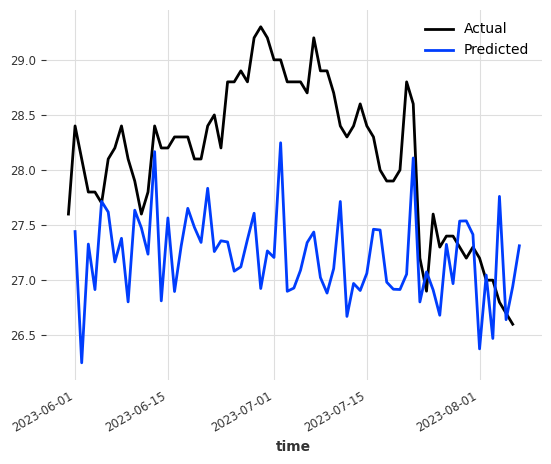

---------- DONE -----------
CPU times: user 14min 13s, sys: 53 s, total: 15min 6s
Wall time: 13min 31s


In [49]:
%%time
columns = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min']
for col in columns:
  train = data.loc[:'2023-05-31']
  test = data.loc['2023-05-31':]
  print(col)
  lst_random_numbers = []
  for i in range(10):
    random_three = []
    for n in range(3):
      random_number = random.randint(-20, -3)
      random_three.append(random_number)
    lst_random_numbers.append(random_three)

  def objective(trial):
    y_train = TimeSeries.from_series(train[col])
    y_test = TimeSeries.from_series(test[col])
    scaler = StandardScaler()

    transformer = Scaler(scaler)
    series_transformed = transformer.fit_transform(y_train)
    val = trial.suggest_categorical('lags', [k for k in lst_random_numbers])
    # Using several darts models to find what works best for each feature
    lst = trial.suggest_categorical('model', ['RegressionModel', 'CatBoostModel', 'RandomForest', 'LightGBMModel', 'XGBModel'])
    model = eval(lst + f'({[val[0]]})')

    model.fit(series=series_transformed)

    preds = model.predict(n=len(test), series=series_transformed)
    n_preds = transformer.inverse_transform(preds)

    val = rmse(y_test, n_preds)
    return val

  def print_callback(study, trial):
      print(f"Current value: {trial.value}, Current params: {trial.params}")
      print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")

  study = optuna.create_study(direction="minimize")
  study.optimize(objective, n_trials=300, callbacks=[print_callback])
  # study.optimize(objective, n_trials=100)

  # Finally, print the best value and best hyperparameters:
  print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")

  print(objective(study.best_trial))

  n_params = study.best_trial.params

# ---- Using the best parameters on a fresh model again ------------

  y_train = TimeSeries.from_series(train[col])
  y_test = TimeSeries.from_series(test[col])

  scaler = StandardScaler()

  transformer = Scaler(scaler)
  series_transformed = transformer.fit_transform(y_train)
  model = eval(n_params['model'] + f'(lags = {n_params["lags"]})')
  model.fit(series=series_transformed)
  preds = model.predict(n=len(test), series=series_transformed)
  n_preds = transformer.inverse_transform(preds)

  # Bolding RMSE value for better view
  print(f'RMSE =\033[1m  {rmse(y_test, n_preds)}  \033[0m')

  # visualizations
  plt.figure()
  y_test.plot(label='Actual')
  n_preds.plot(label='Predicted')
  plt.legend()
  plt.show()
  print('---------- DONE -----------')

**The Plan**

The plan is to find to find the perfect model for each feature, tune that model and if I'm happy with it, use it to forecast future

**Note:**

The thing I realize is that the models perform decent with about RMSE below 1.5

But the issue is that when I'm trying to make visualizations, the graphs are way off and indicate as if the model is performing not. I would actually like your input on that.